In [1]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
import warnings
warnings.filterwarnings("ignore")
data = pd.read_csv('Corporate-Data.csv')



In [3]:
data.head()

Rating                   Name Symbol                  Rating Agency Name  \
0      A  Whirlpool Corporation    WHR          Egan-Jones Ratings Company   
1    BBB  Whirlpool Corporation    WHR          Egan-Jones Ratings Company   
2    BBB  Whirlpool Corporation    WHR                       Fitch Ratings   
3    BBB  Whirlpool Corporation    WHR                       Fitch Ratings   
4    BBB  Whirlpool Corporation    WHR  Standard & Poor's Ratings Services   

         Date             Sector  currentRatio  quickRatio  cashRatio  \
0  11/27/2015  Consumer Durables      0.945894    0.426395   0.099690   
1   2/13/2014  Consumer Durables      1.033559    0.498234   0.203120   
2    3/6/2015  Consumer Durables      0.963703    0.451505   0.122099   
3   6/15/2012  Consumer Durables      1.019851    0.510402   0.176116   
4  10/24/2016  Consumer Durables      0.957844    0.495432   0.141608   

   daysOfSalesOutstanding  ...  effectiveTaxRate  \
0               44.203245  ...          0.202716   
1               38.991156  ...          0.074155   
2               50.841385  ...          0.214529   
3               41.161738  ...          1.816667   
4               47.761126  ...          0.166966   

   freeCashFlowOperatingCashFlowRatio  freeCashFlowPerShare  cashPerShare  \
0                            0.437551              6.810673      9.809403   
1                            0.541997              8.625473     17.402270   
2                            0.513185              9.693487     13.103448   
3                           -0.147170             -1.015625     14.440104   
4                            0.451372              7.135348     14.257556   

   companyEquityMultiplier  ebitPerRevenue  enterpriseValueMultiple  \
0                 4.008012        0.049351                 7.057088   
1                 3.156783        0.048857                 6.460618   
2                 4.094575        0.044334                10.491970   
3                 3.630950       -0.012858                 4.080741   
4                 4.012780        0.053770                 8.293505   

   operatingCashFlowPerShare  operatingCashFlowSalesRatio  payablesTurnover  
0                  15.565438                     0.058638          3.906655  
1                  15.914250                     0.067239          4.002846  
2                  18.888889                     0.074426          3.483510  
3                   6.901042                     0.028394          4.581150  
4                  15.808147                     0.058065          3.857790  

[5 rows x 31 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Rating                              2029 non-null   object 
 1   Name                                2029 non-null   object 
 2   Symbol                              2029 non-null   object 
 3   Rating Agency Name                  2029 non-null   object 
 4   Date                                2029 non-null   object 
 5   Sector                              2029 non-null   object 
 6   currentRatio                        2029 non-null   float64
 7   quickRatio                          2029 non-null   float64
 8   cashRatio                           2029 non-null   float64
 9   daysOfSalesOutstanding              2029 non-null   float64
 10  netProfitMargin                     2029 non-null   float64
 11  pretaxProfitMargin                  2029 no

Text(0.5, 1.0, 'Credit Rating')

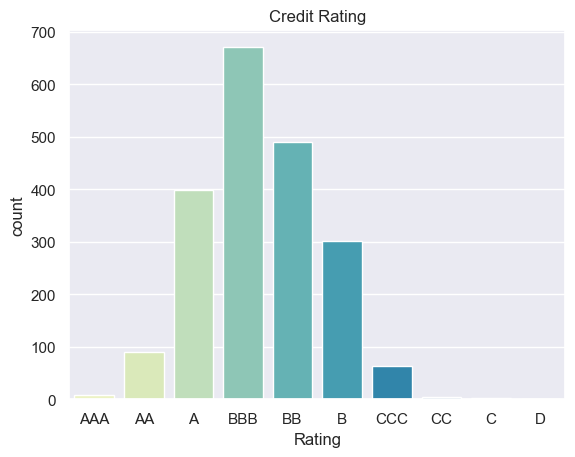

In [5]:
sns.set(font_scale=1) # size of font
ax=sns.countplot(data=data, x='Rating',order=['AAA','AA','A','BBB','BB','B','CCC','CC','C','D'],palette="YlGnBu")
plt.title('Credit Rating')

Text(0.5, 0.98, 'Liquidity Measurement Ratios')

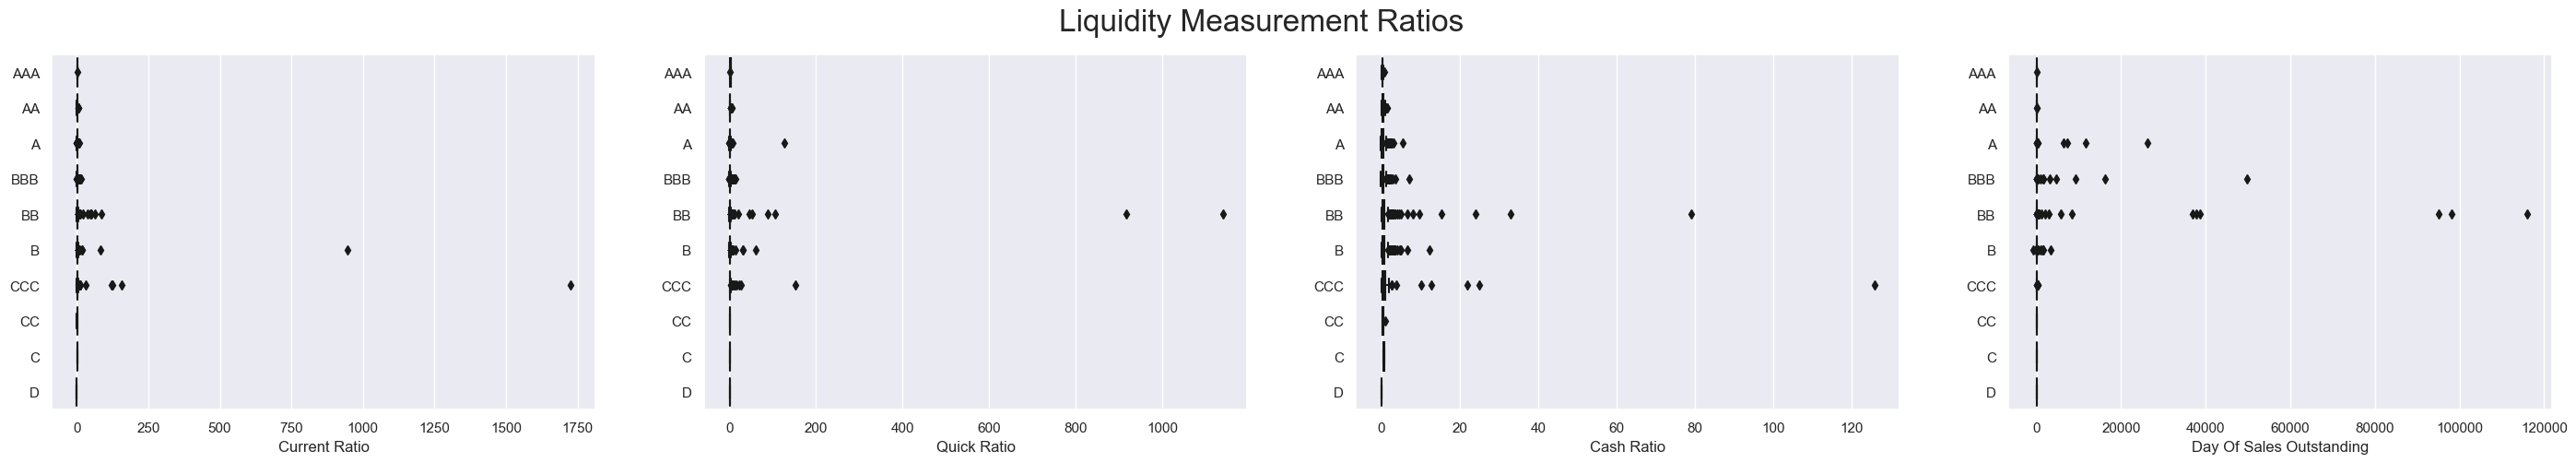

In [6]:
fig, axes = plt.subplots(1, 4,figsize=(35,5))
axes = axes.flatten()
#sns.set_theme(style = "whitegrid")
order=['AAA','AA','A','BBB','BB','B','CCC','CC','C','D']
sns.boxplot(ax = axes[0],x='currentRatio',y='Rating',data=data,palette="ch:.25",order=order).set(xlabel="Current Ratio",ylabel="")
sns.boxplot(ax = axes[1],x='quickRatio',y='Rating',data=data,palette="ch:.25",order=order).set(xlabel="Quick Ratio",ylabel="")
sns.boxplot(ax = axes[2],x='cashRatio',y='Rating',data=data,palette="ch:.25",order=order).set(xlabel="Cash Ratio",ylabel="")
sns.boxplot(ax = axes[3],x='daysOfSalesOutstanding',y='Rating',data=data,palette="ch:.25",order=order).set(
    xlabel="Day Of Sales Outstanding",ylabel="")
fig.suptitle("Liquidity Measurement Ratios",fontsize=24)

Text(0.5, 0.98, 'Profitability Indicator Ratios')

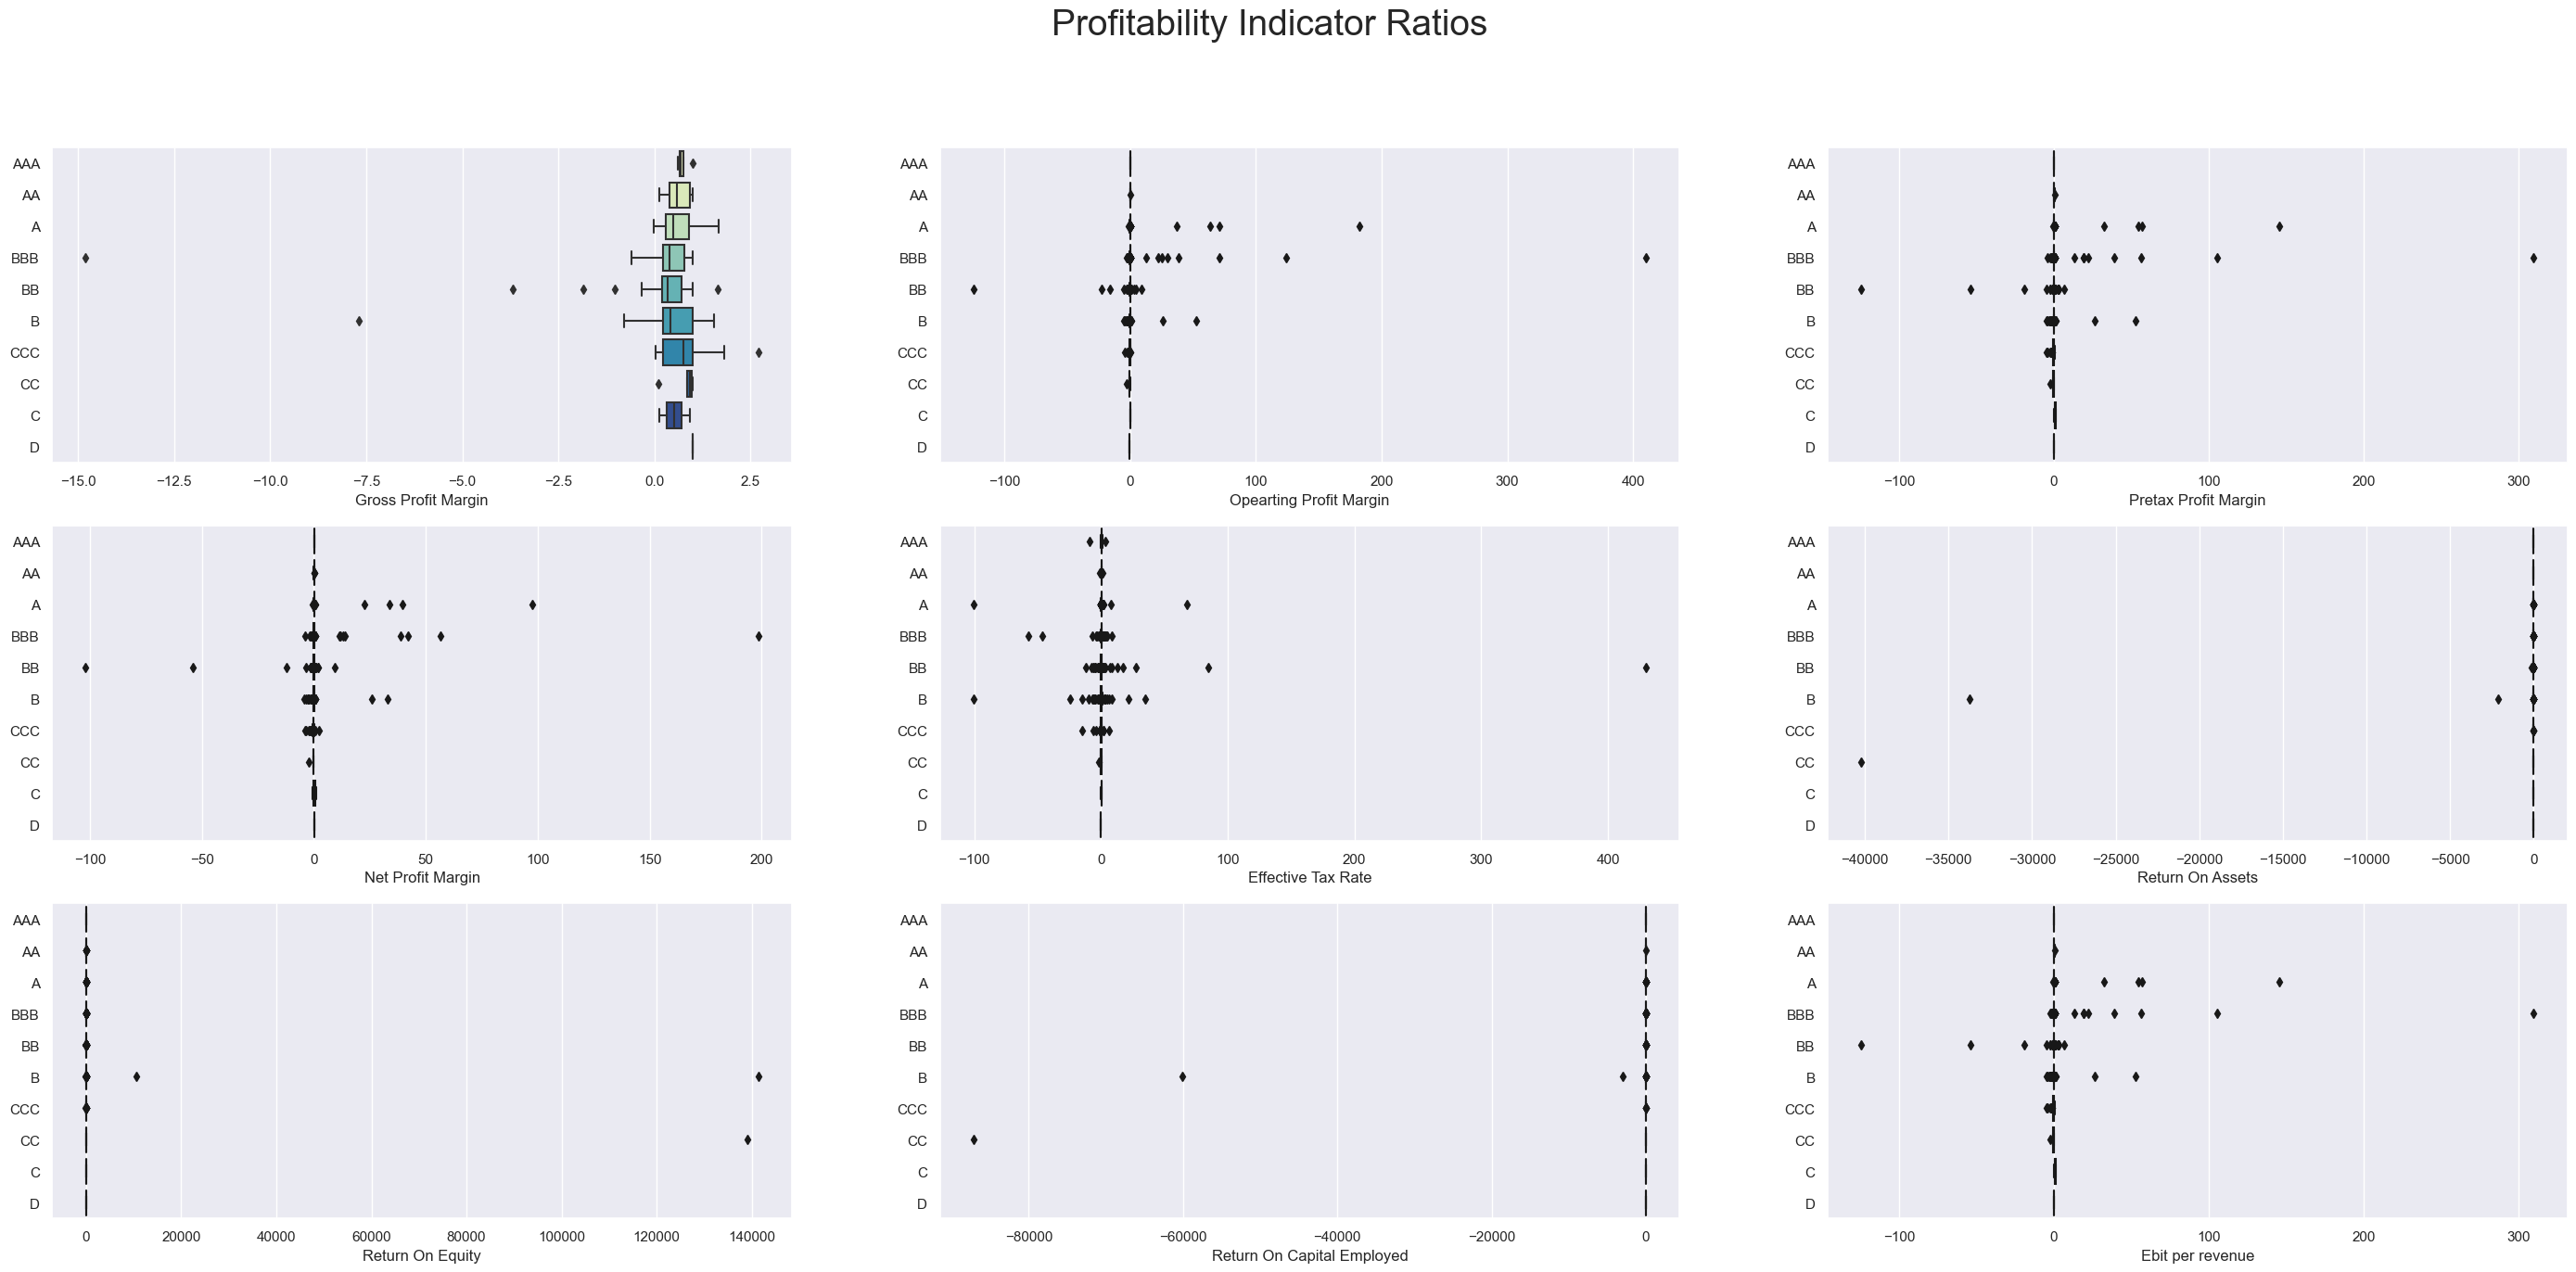

In [7]:
fig, axes = plt.subplots(3, 3,figsize=(35,15))
axes = axes.flatten()

order=['AAA','AA','A','BBB','BB','B','CCC','CC','C','D']
sns.boxplot(ax = axes[0],x='grossProfitMargin',y='Rating',data=data,palette="YlGnBu",order=order).set(
    xlabel="Gross Profit Margin",ylabel="")
sns.boxplot(ax = axes[1],x='operatingProfitMargin',y='Rating',data=data,palette="ch:.25",order=order).set(
    xlabel="Opearting Profit Margin",ylabel="")
sns.boxplot(ax = axes[2],x='pretaxProfitMargin',y='Rating',data=data,palette="ch:.25",order=order).set(
    xlabel="Pretax Profit Margin",ylabel="")
sns.boxplot(ax = axes[3],x='netProfitMargin',y='Rating',data=data,palette="ch:.25",order=order).set(
    xlabel="Net Profit Margin",ylabel="")
sns.boxplot(ax = axes[4],x='effectiveTaxRate',y='Rating',data=data,palette="ch:.25",order=order).set(
    xlabel="Effective Tax Rate",ylabel="")
sns.boxplot(ax = axes[5],x='returnOnAssets',y='Rating',data=data,palette="ch:.25",order=order).set(
    xlabel="Return On Assets",ylabel="")
sns.boxplot(ax = axes[6],x='returnOnEquity',y='Rating',data=data,palette="ch:.25",order=order).set(
    xlabel="Return On Equity",ylabel="")
sns.boxplot(ax = axes[7],x='returnOnCapitalEmployed',y='Rating',data=data,palette="ch:.25",order=order).set(
    xlabel="Return On Capital Employed",ylabel="")
sns.boxplot(ax = axes[8],x='ebitPerRevenue',y='Rating',data=data,palette="ch:.25",order=order).set(
    xlabel="Ebit per revenue",ylabel="")
fig.suptitle("Profitability Indicator Ratios",fontsize=28)


Text(0.5, 0.98, 'Debt Ratios')

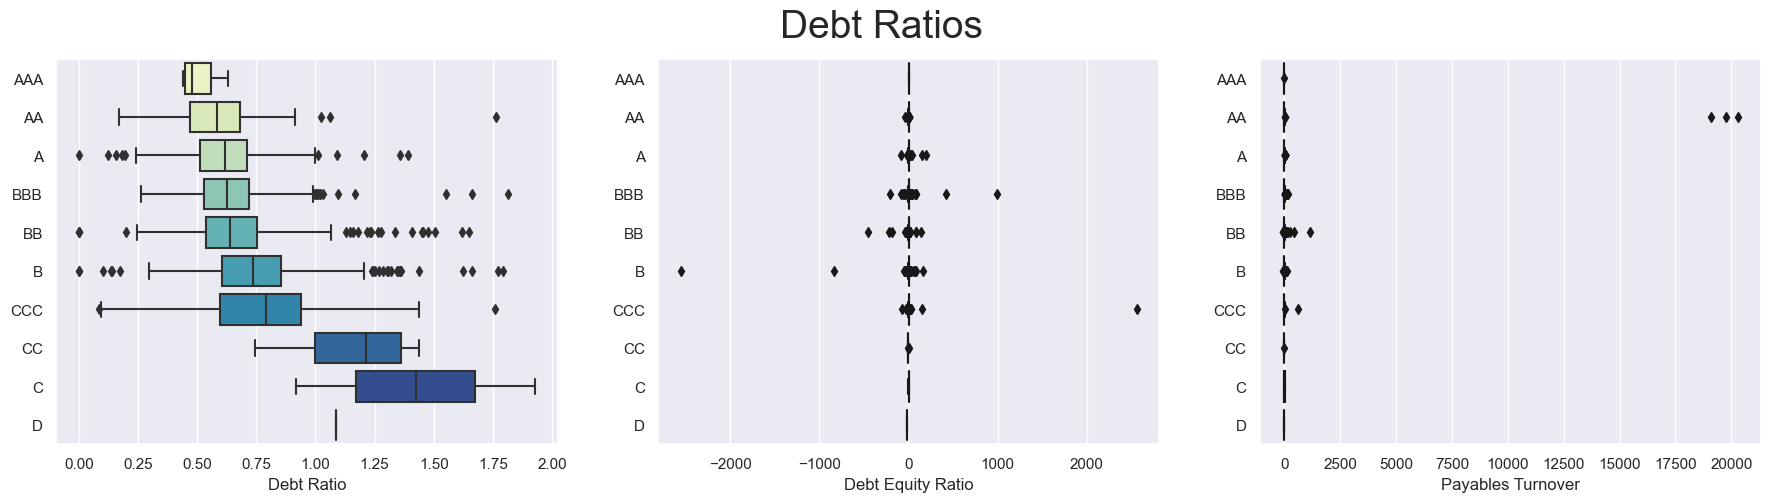

In [8]:
fig, axes = plt.subplots(1,3,figsize=(22,5))
axes = axes.flatten()

order=['AAA','AA','A','BBB','BB','B','CCC','CC','C','D']
sns.boxplot(ax = axes[0],x='debtRatio',y="Rating",data=data,palette="YlGnBu",order=order).set(
    xlabel="Debt Ratio",ylabel="")
sns.boxplot(ax = axes[1],x='debtEquityRatio',y="Rating",data=data,palette="ch:.25",order=order).set(
    xlabel="Debt Equity Ratio",ylabel="")
sns.boxplot(ax = axes[2],x='payablesTurnover',y="Rating",data=data,palette="ch:.25",order=order).set(
    xlabel="Payables Turnover",ylabel="")
fig.suptitle("Debt Ratios",fontsize=28)



Text(0.5, 0.98, 'Opearting Performance Ratio')

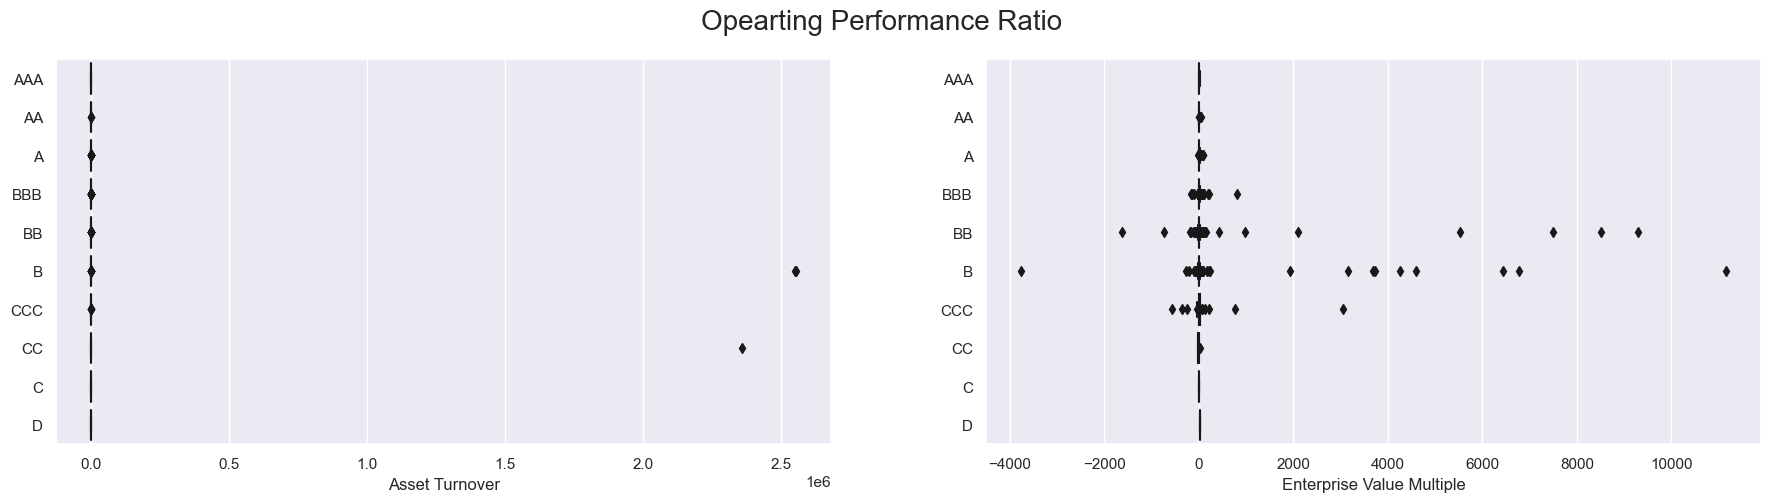

In [9]:
fig, axes = plt.subplots(1,2,figsize=(22,5))
axes = axes.flatten()
order=['AAA','AA','A','BBB','BB','B','CCC','CC','C','D']
sns.boxplot(ax = axes[0],x='assetTurnover',y='Rating',data=data,palette="ch:.25",order=order).set(
    xlabel='Asset Turnover',ylabel="")
sns.boxplot(ax = axes[1],x='enterpriseValueMultiple',y="Rating",data=data,palette="ch:.25",order=order).set(
    xlabel="Enterprise Value Multiple",ylabel="")
fig.suptitle("Opearting Performance Ratio",fontsize=20)

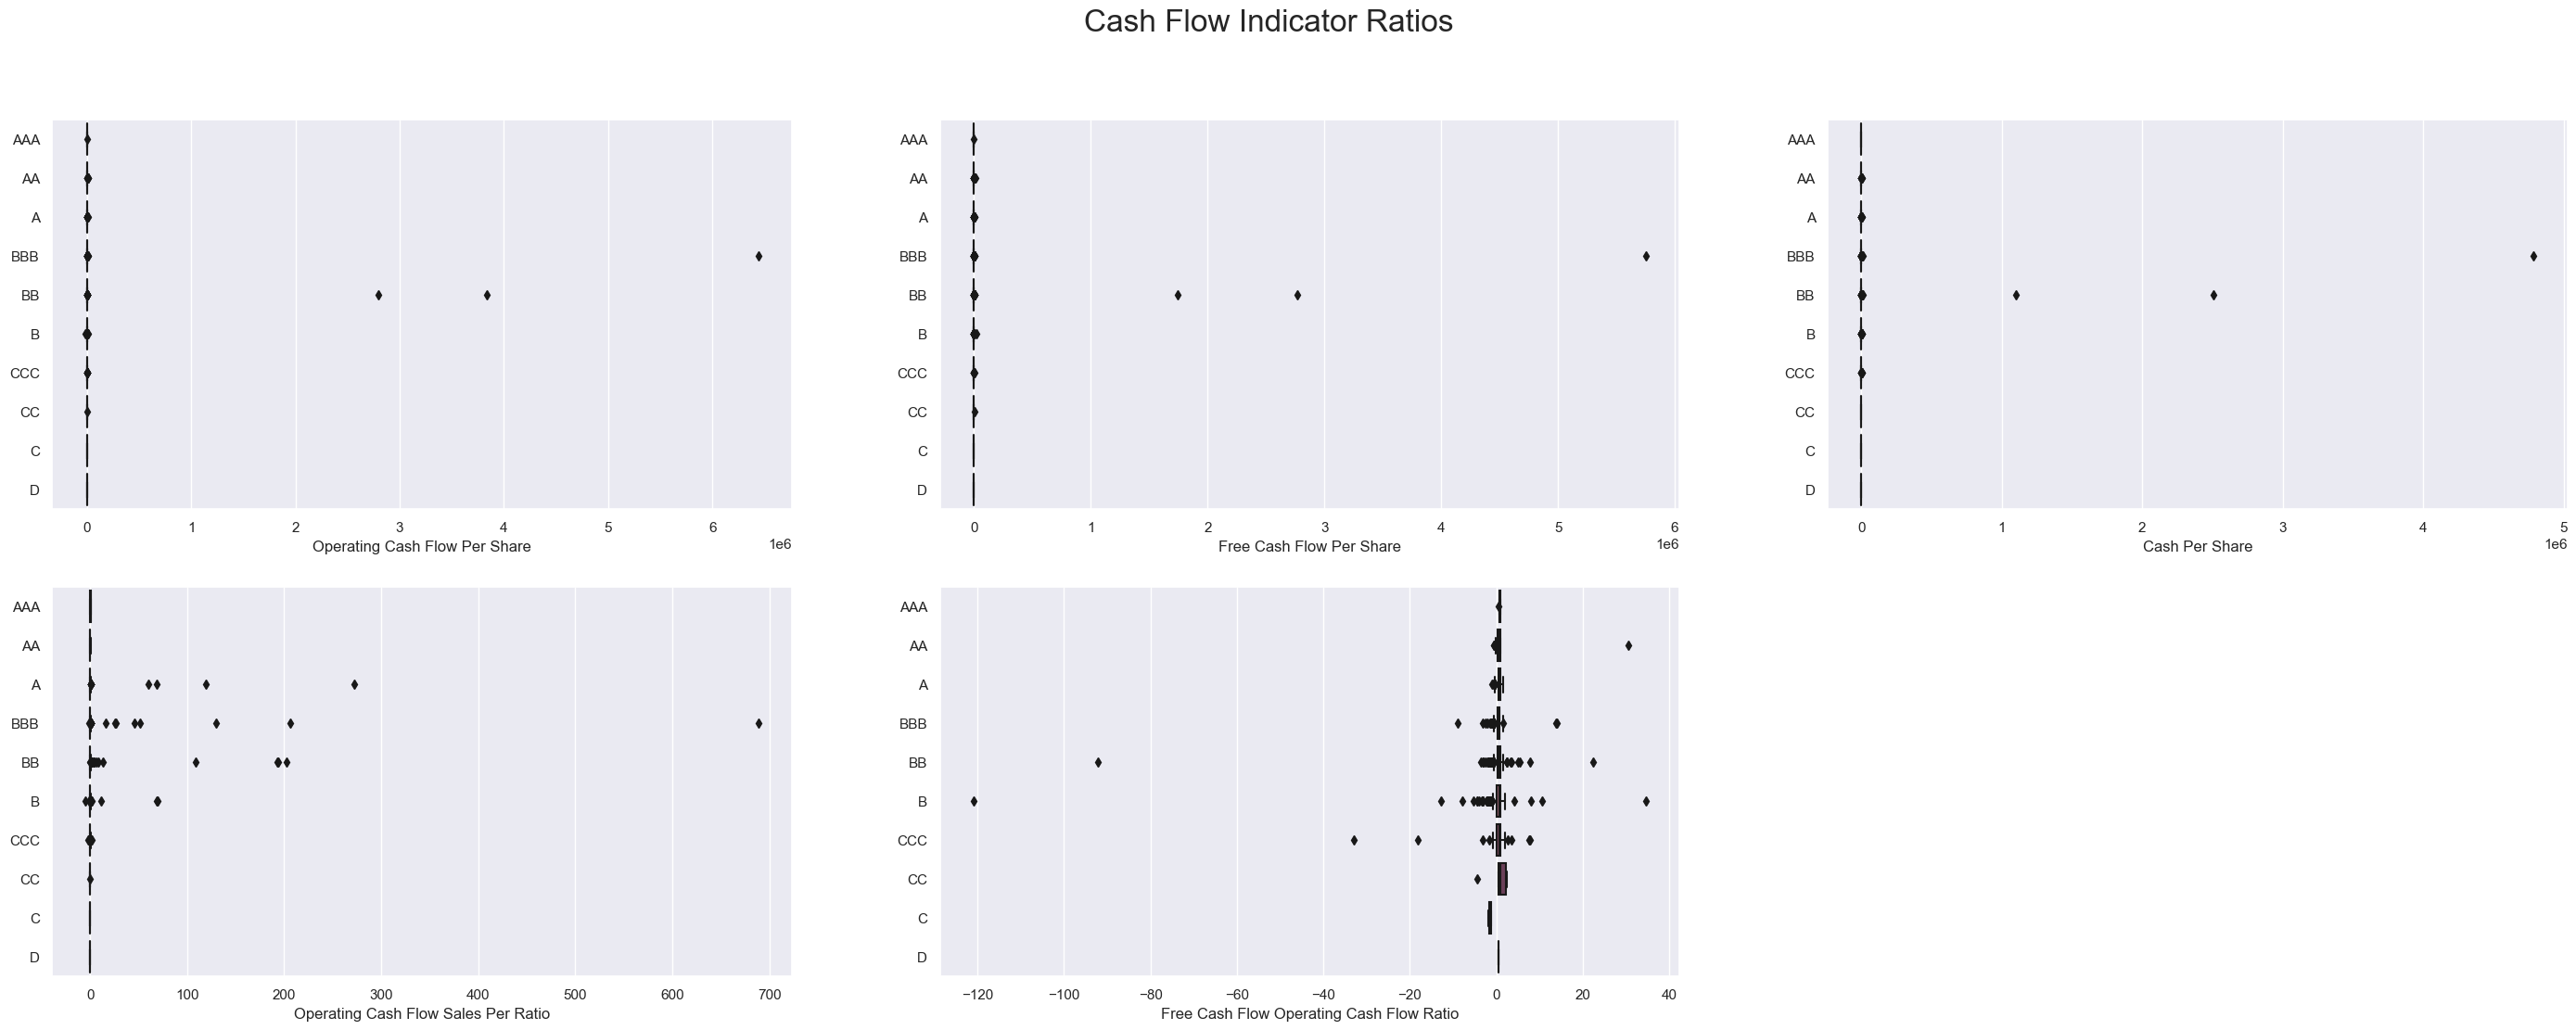

In [10]:
fig, axes = plt.subplots(2,3,figsize=(35,12))
axes = axes.flatten()
order=['AAA','AA','A','BBB','BB','B','CCC','CC','C','D']
sns.boxplot(ax = axes[0],x='operatingCashFlowPerShare',y='Rating',data=data,palette="ch:.25",order=order).set(
    xlabel="Operating Cash Flow Per Share",ylabel="")
sns.boxplot(ax = axes[1],x='freeCashFlowPerShare',y='Rating',data=data,palette="ch:.25",order=order).set(
    xlabel="Free Cash Flow Per Share",ylabel="")
sns.boxplot(ax = axes[2],x='cashPerShare',y='Rating',data=data,palette="ch:.25",order=order).set(
    xlabel="Cash Per Share",ylabel="")
sns.boxplot(ax = axes[3],x='operatingCashFlowSalesRatio',y='Rating',data=data,palette="ch:.25",order=order).set(
    xlabel="Operating Cash Flow Sales Per Ratio",ylabel="")
sns.boxplot(ax = axes[4],x='freeCashFlowOperatingCashFlowRatio',y='Rating',data=data,palette="ch:.25",order=order).set(
    xlabel="Free Cash Flow Operating Cash Flow Ratio",ylabel="")
fig.suptitle("Cash Flow Indicator Ratios",fontsize=24)
fig.delaxes(axes[5]) 

Text(0.5, 1.0, 'Risk Ratio')

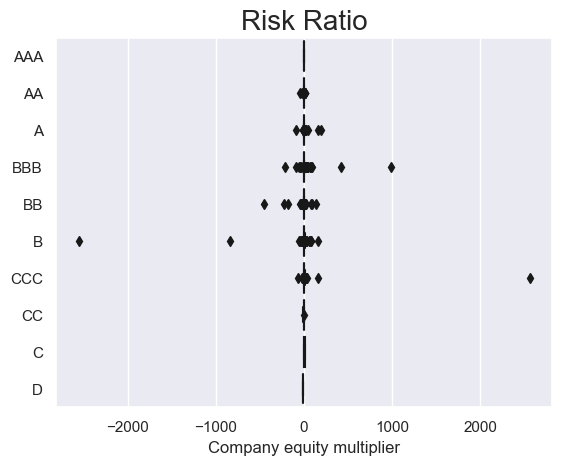

In [11]:
figsize=(22,5)
order=['AAA','AA','A','BBB','BB','B','CCC','CC','C','D']
sns.boxplot(x='companyEquityMultiplier',y='Rating',data=data,palette="ch:.25",order=order).set(
    xlabel='Company equity multiplier',ylabel="")
plt.title("Risk Ratio",fontsize=20)

In [12]:
data.skew(axis = 0, skipna = True)

currentRatio                          34.338889
quickRatio                            30.925641
cashRatio                             27.098772
daysOfSalesOutstanding                20.399567
netProfitMargin                       17.619910
pretaxProfitMargin                    22.096334
grossProfitMargin                    -14.203446
operatingProfitMargin                 26.493892
returnOnAssets                       -32.112571
returnOnCapitalEmployed              -33.318531
returnOnEquity                        31.702500
assetTurnover                         26.020347
fixedAssetTurnover                    26.120457
debtEquityRatio                        0.268993
debtRatio                              1.285251
effectiveTaxRate                      32.308742
freeCashFlowOperatingCashFlowRatio   -22.913129
freeCashFlowPerShare                  33.677207
cashPerShare                          34.025861
companyEquityMultiplier                0.269093
ebitPerRevenue                        22

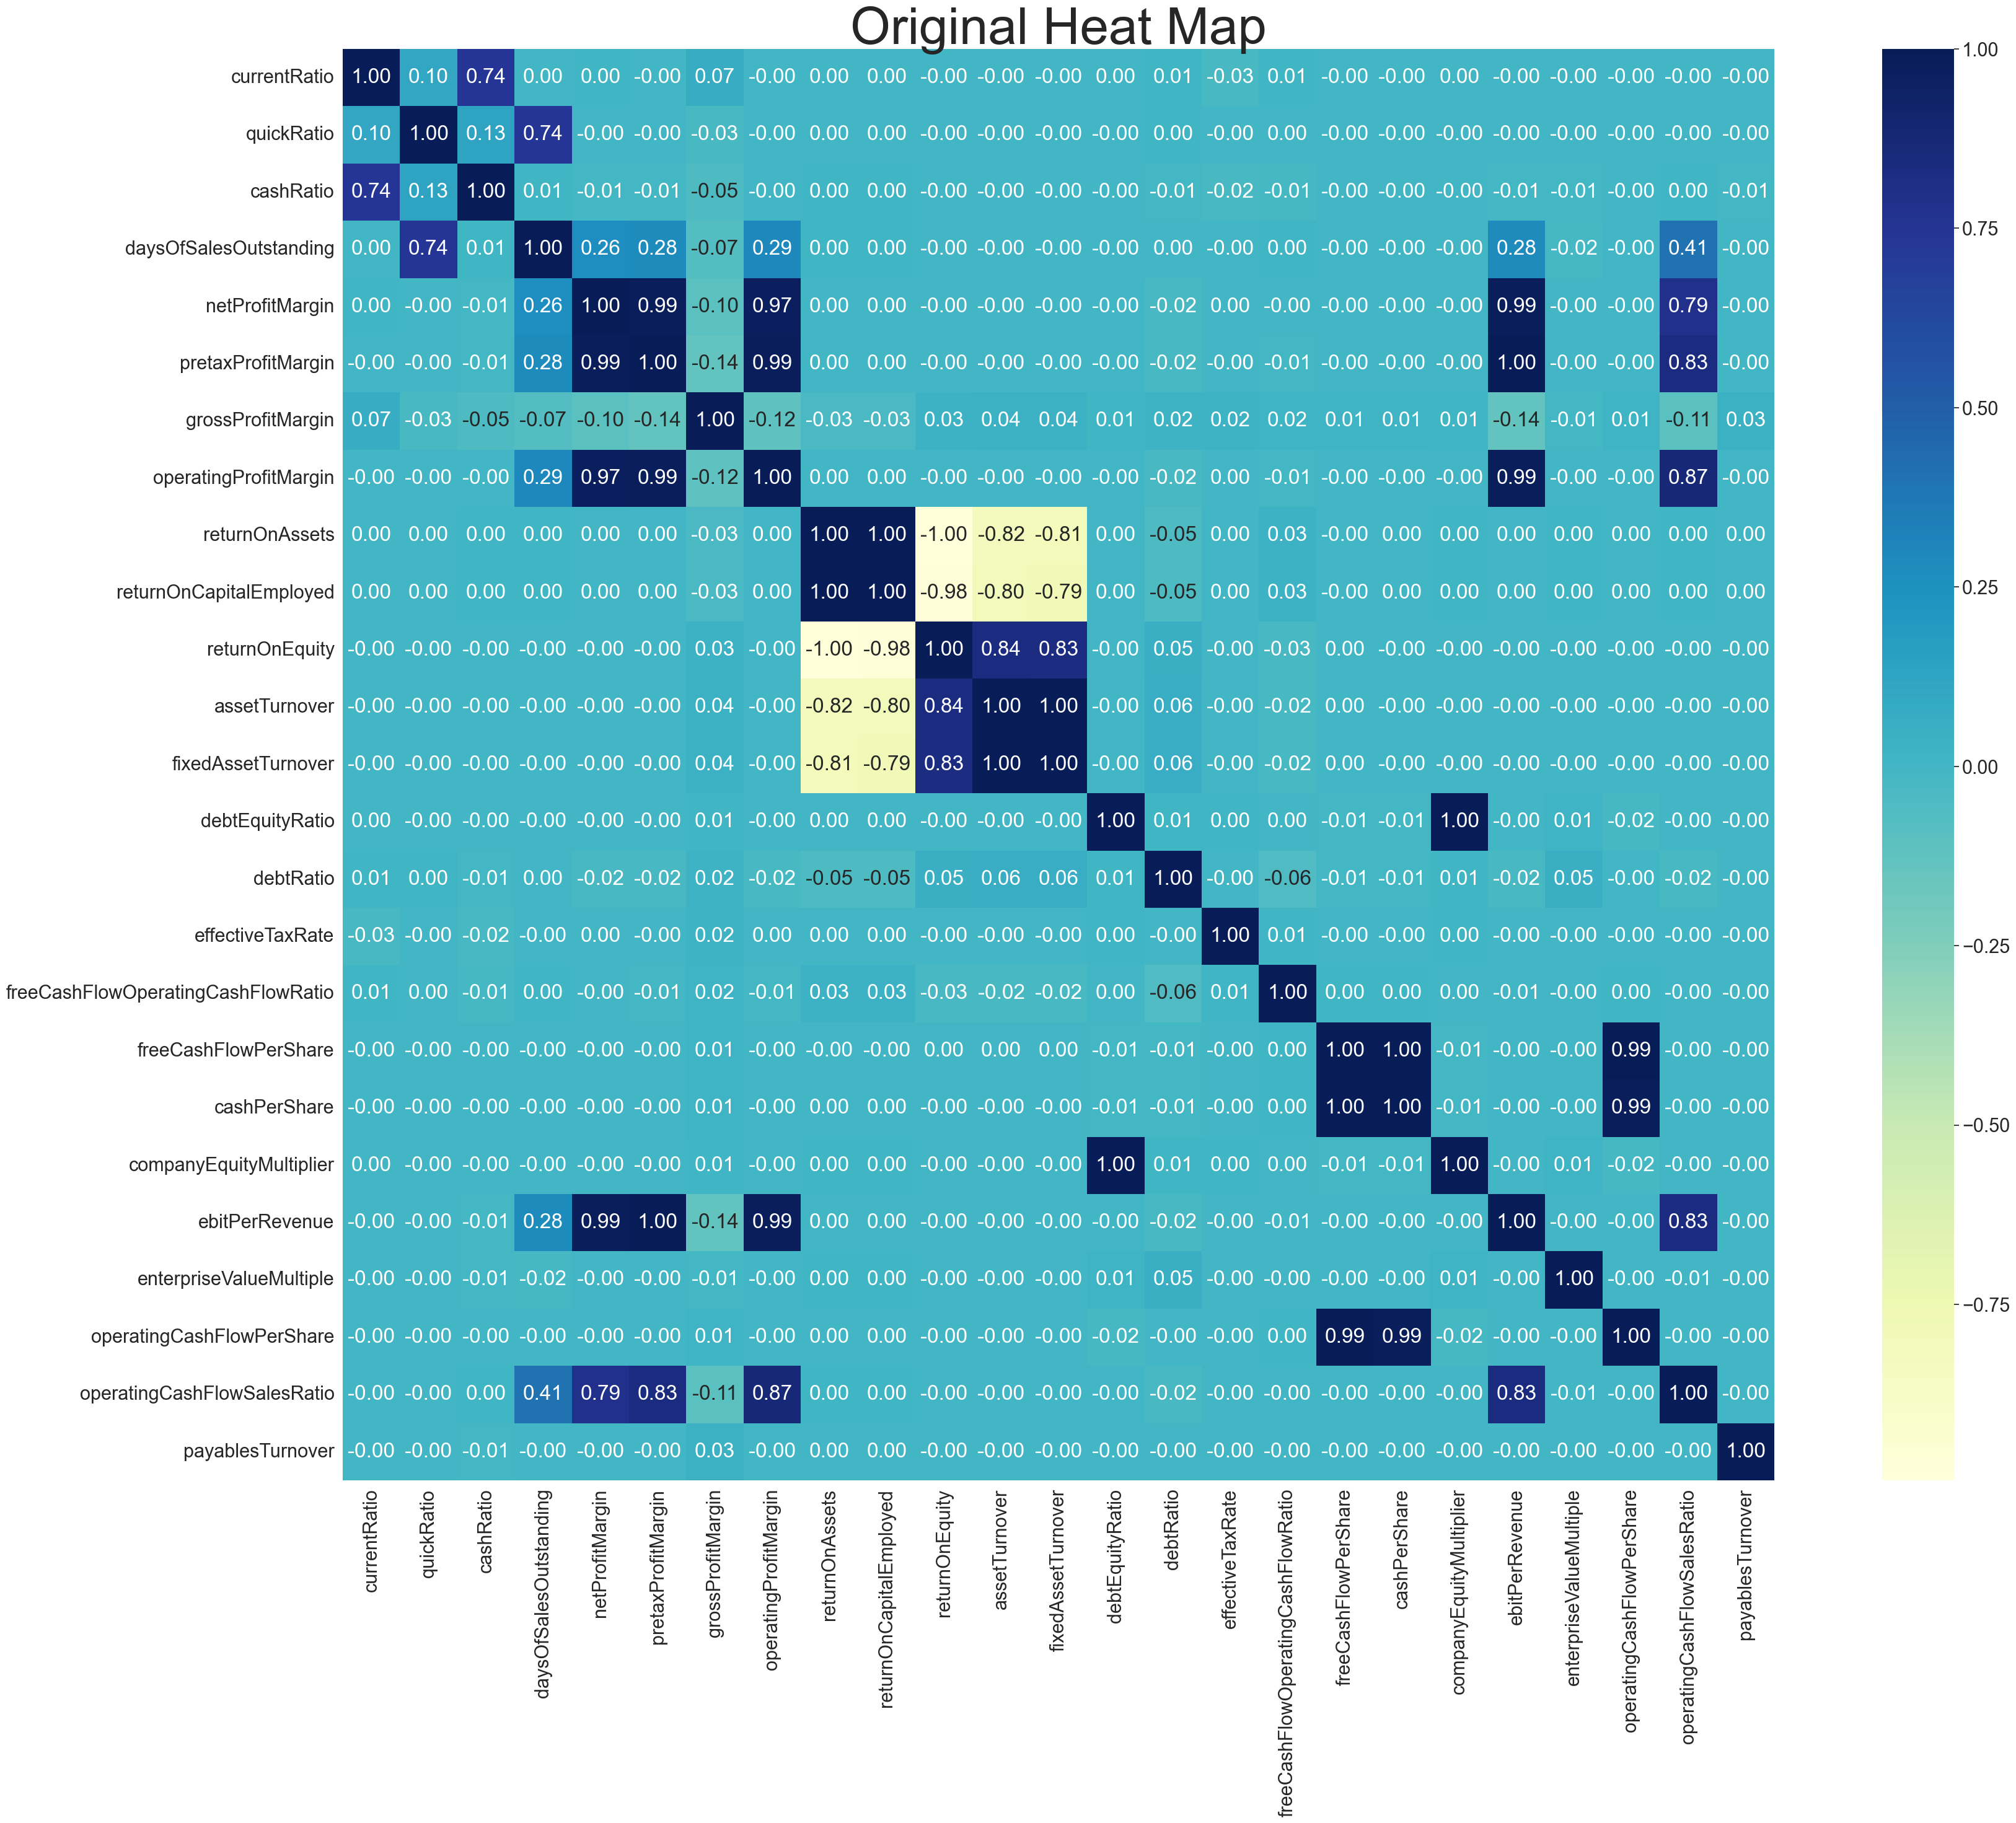

In [13]:
corr = data.iloc[:,6:31].corr()
plt.figure(figsize=(45,30))
sns.set(font_scale=2) 
sns.heatmap(corr,cbar=True, annot=True, square=True ,fmt='.2f',cmap="YlGnBu")
plt.title("Original Heat Map",fontsize=60)
plt.show()

In [14]:
df_RemoveOutlier = data.copy()
for j in df_RemoveOutlier.columns[6:31]:
    q1 = df_RemoveOutlier[j].quantile(0.25)
    q3 = df_RemoveOutlier[j].quantile(0.75)
    iqr = q3 - q1 
    lower_fence  = q1-1.5*iqr
    higher_fence = q3+1.5*iqr
    for i in range(len(df_RemoveOutlier)):
        if data.loc[i,j] < lower_fence or data.loc[i,j] > higher_fence: 
            df_RemoveOutlier.loc[i,j] = None
        else: 
            df_RemoveOutlier.loc[i,j] = df_RemoveOutlier.loc[i,j]
df_RemoveOutlier = df_RemoveOutlier.dropna()

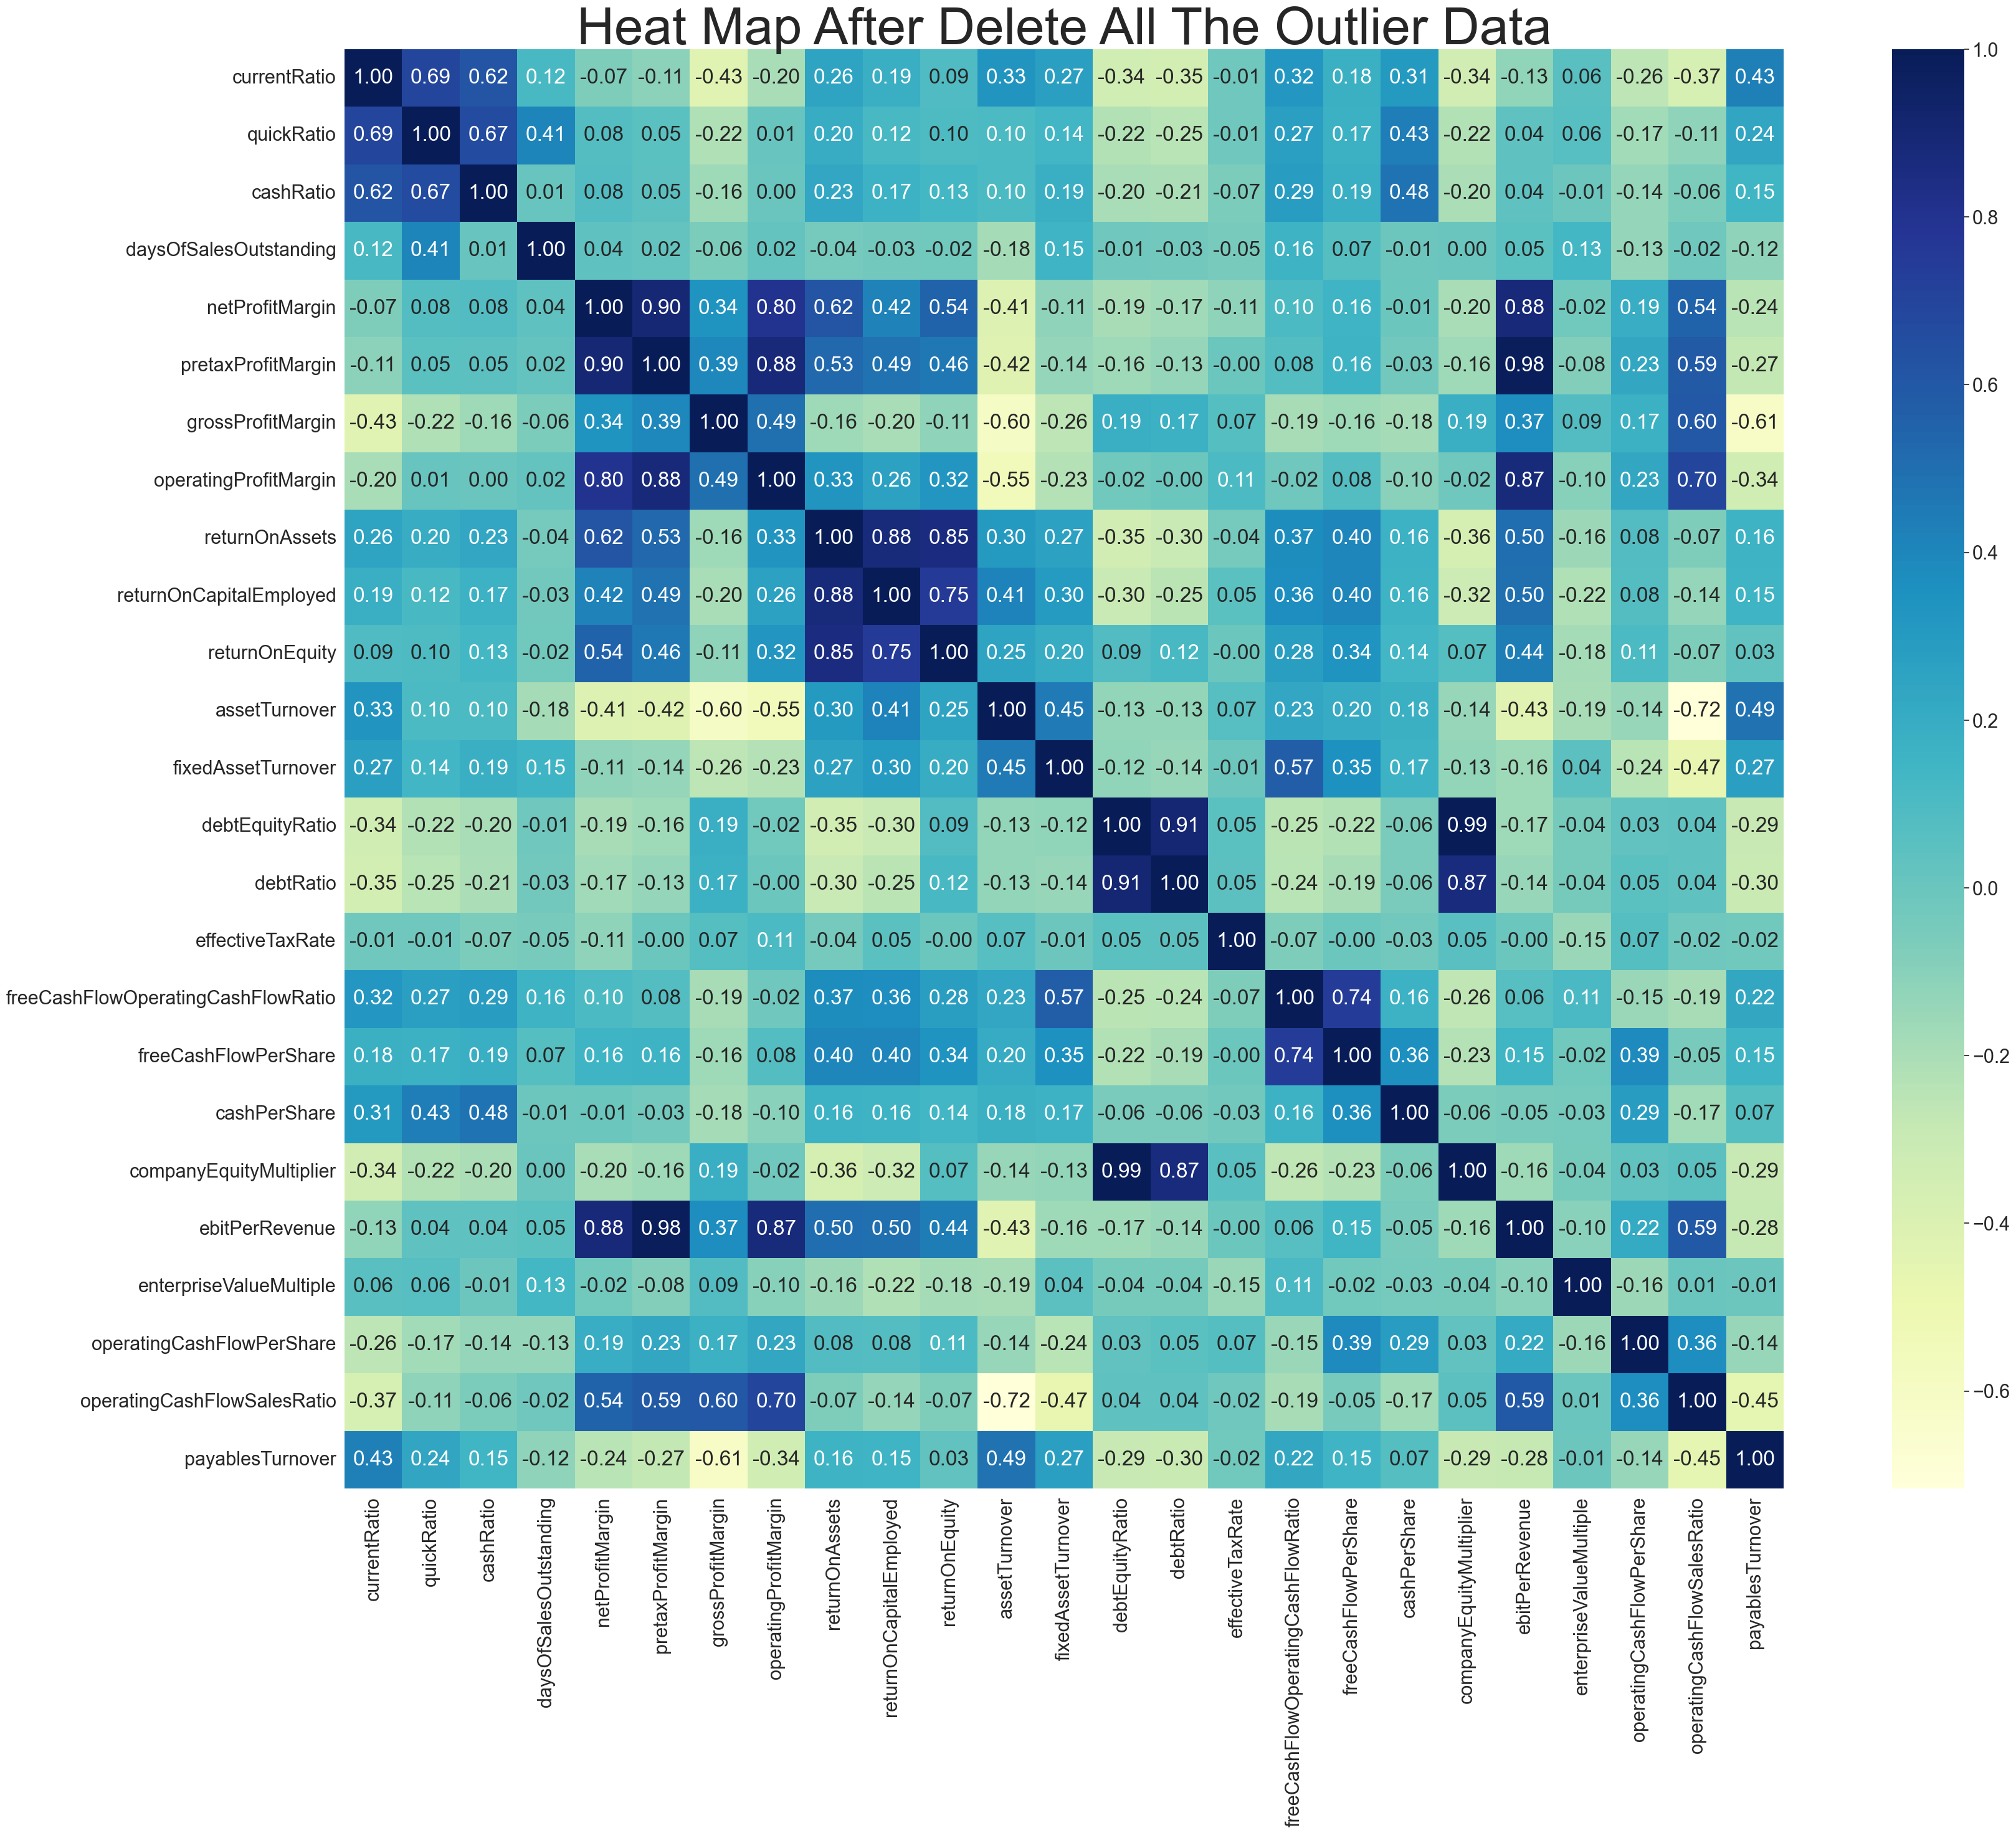

In [17]:
corr = df_RemoveOutlier.iloc[:,6:31].corr()
plt.figure(figsize=(45,30))
sns.set(font_scale=2) 
sns.heatmap(corr,cbar=True, annot=True, square=True ,fmt='.2f',cmap="YlGnBu")
plt.title("Heat Map After Delete All The Outlier Data",fontsize=60)
plt.show()


In [18]:
df_fillin = data.copy()
for j in df_fillin.columns[6:31]:
    q1 = df_fillin[j].quantile(0.25)
    q3 = df_fillin[j].quantile(0.75)
    iqr = q3 - q1 
    lower_fence  = q1-1.5*iqr
    higher_fence = q3+1.5*iqr
    for i in range(len(df_fillin)):
        if data.loc[i,j] < lower_fence:
            df_fillin.loc[i,j] = lower_fence
        elif data.loc[i,j] > higher_fence:
            df_fillin.loc[i,j] = higher_fence
        else:
            df_fillin.loc[i,j] = df_fillin.loc[i,j]

In [19]:
df_fillin.head()

Rating                   Name Symbol                  Rating Agency Name  \
0      A  Whirlpool Corporation    WHR          Egan-Jones Ratings Company   
1    BBB  Whirlpool Corporation    WHR          Egan-Jones Ratings Company   
2    BBB  Whirlpool Corporation    WHR                       Fitch Ratings   
3    BBB  Whirlpool Corporation    WHR                       Fitch Ratings   
4    BBB  Whirlpool Corporation    WHR  Standard & Poor's Ratings Services   

         Date             Sector  currentRatio  quickRatio  cashRatio  \
0  11/27/2015  Consumer Durables      0.945894    0.426395   0.099690   
1   2/13/2014  Consumer Durables      1.033559    0.498234   0.203120   
2    3/6/2015  Consumer Durables      0.963703    0.451505   0.122099   
3   6/15/2012  Consumer Durables      1.019851    0.510402   0.176116   
4  10/24/2016  Consumer Durables      0.957844    0.495432   0.141608   

   daysOfSalesOutstanding  ...  effectiveTaxRate  \
0               44.203245  ...          0.202716   
1               38.991156  ...          0.074155   
2               50.841385  ...          0.214529   
3               41.161738  ...          0.706351   
4               47.761126  ...          0.166966   

   freeCashFlowOperatingCashFlowRatio  freeCashFlowPerShare  cashPerShare  \
0                            0.437551              6.810673      9.809403   
1                            0.541997              8.625473     17.402270   
2                            0.513185              9.693487     13.103448   
3                           -0.147170             -1.015625     14.440104   
4                            0.451372              7.135348     14.257556   

   companyEquityMultiplier  ebitPerRevenue  enterpriseValueMultiple  \
0                 4.008012        0.049351                 7.057088   
1                 3.156783        0.048857                 6.460618   
2                 4.094575        0.044334                10.491970   
3                 3.630950       -0.012858                 4.080741   
4                 4.012780        0.053770                 8.293505   

   operatingCashFlowPerShare  operatingCashFlowSalesRatio  payablesTurnover  
0                  14.764294                     0.058638          3.906655  
1                  14.764294                     0.067239          4.002846  
2                  14.764294                     0.074426          3.483510  
3                   6.901042                     0.028394          4.581150  
4                  14.764294                     0.058065          3.857790  

[5 rows x 31 columns]

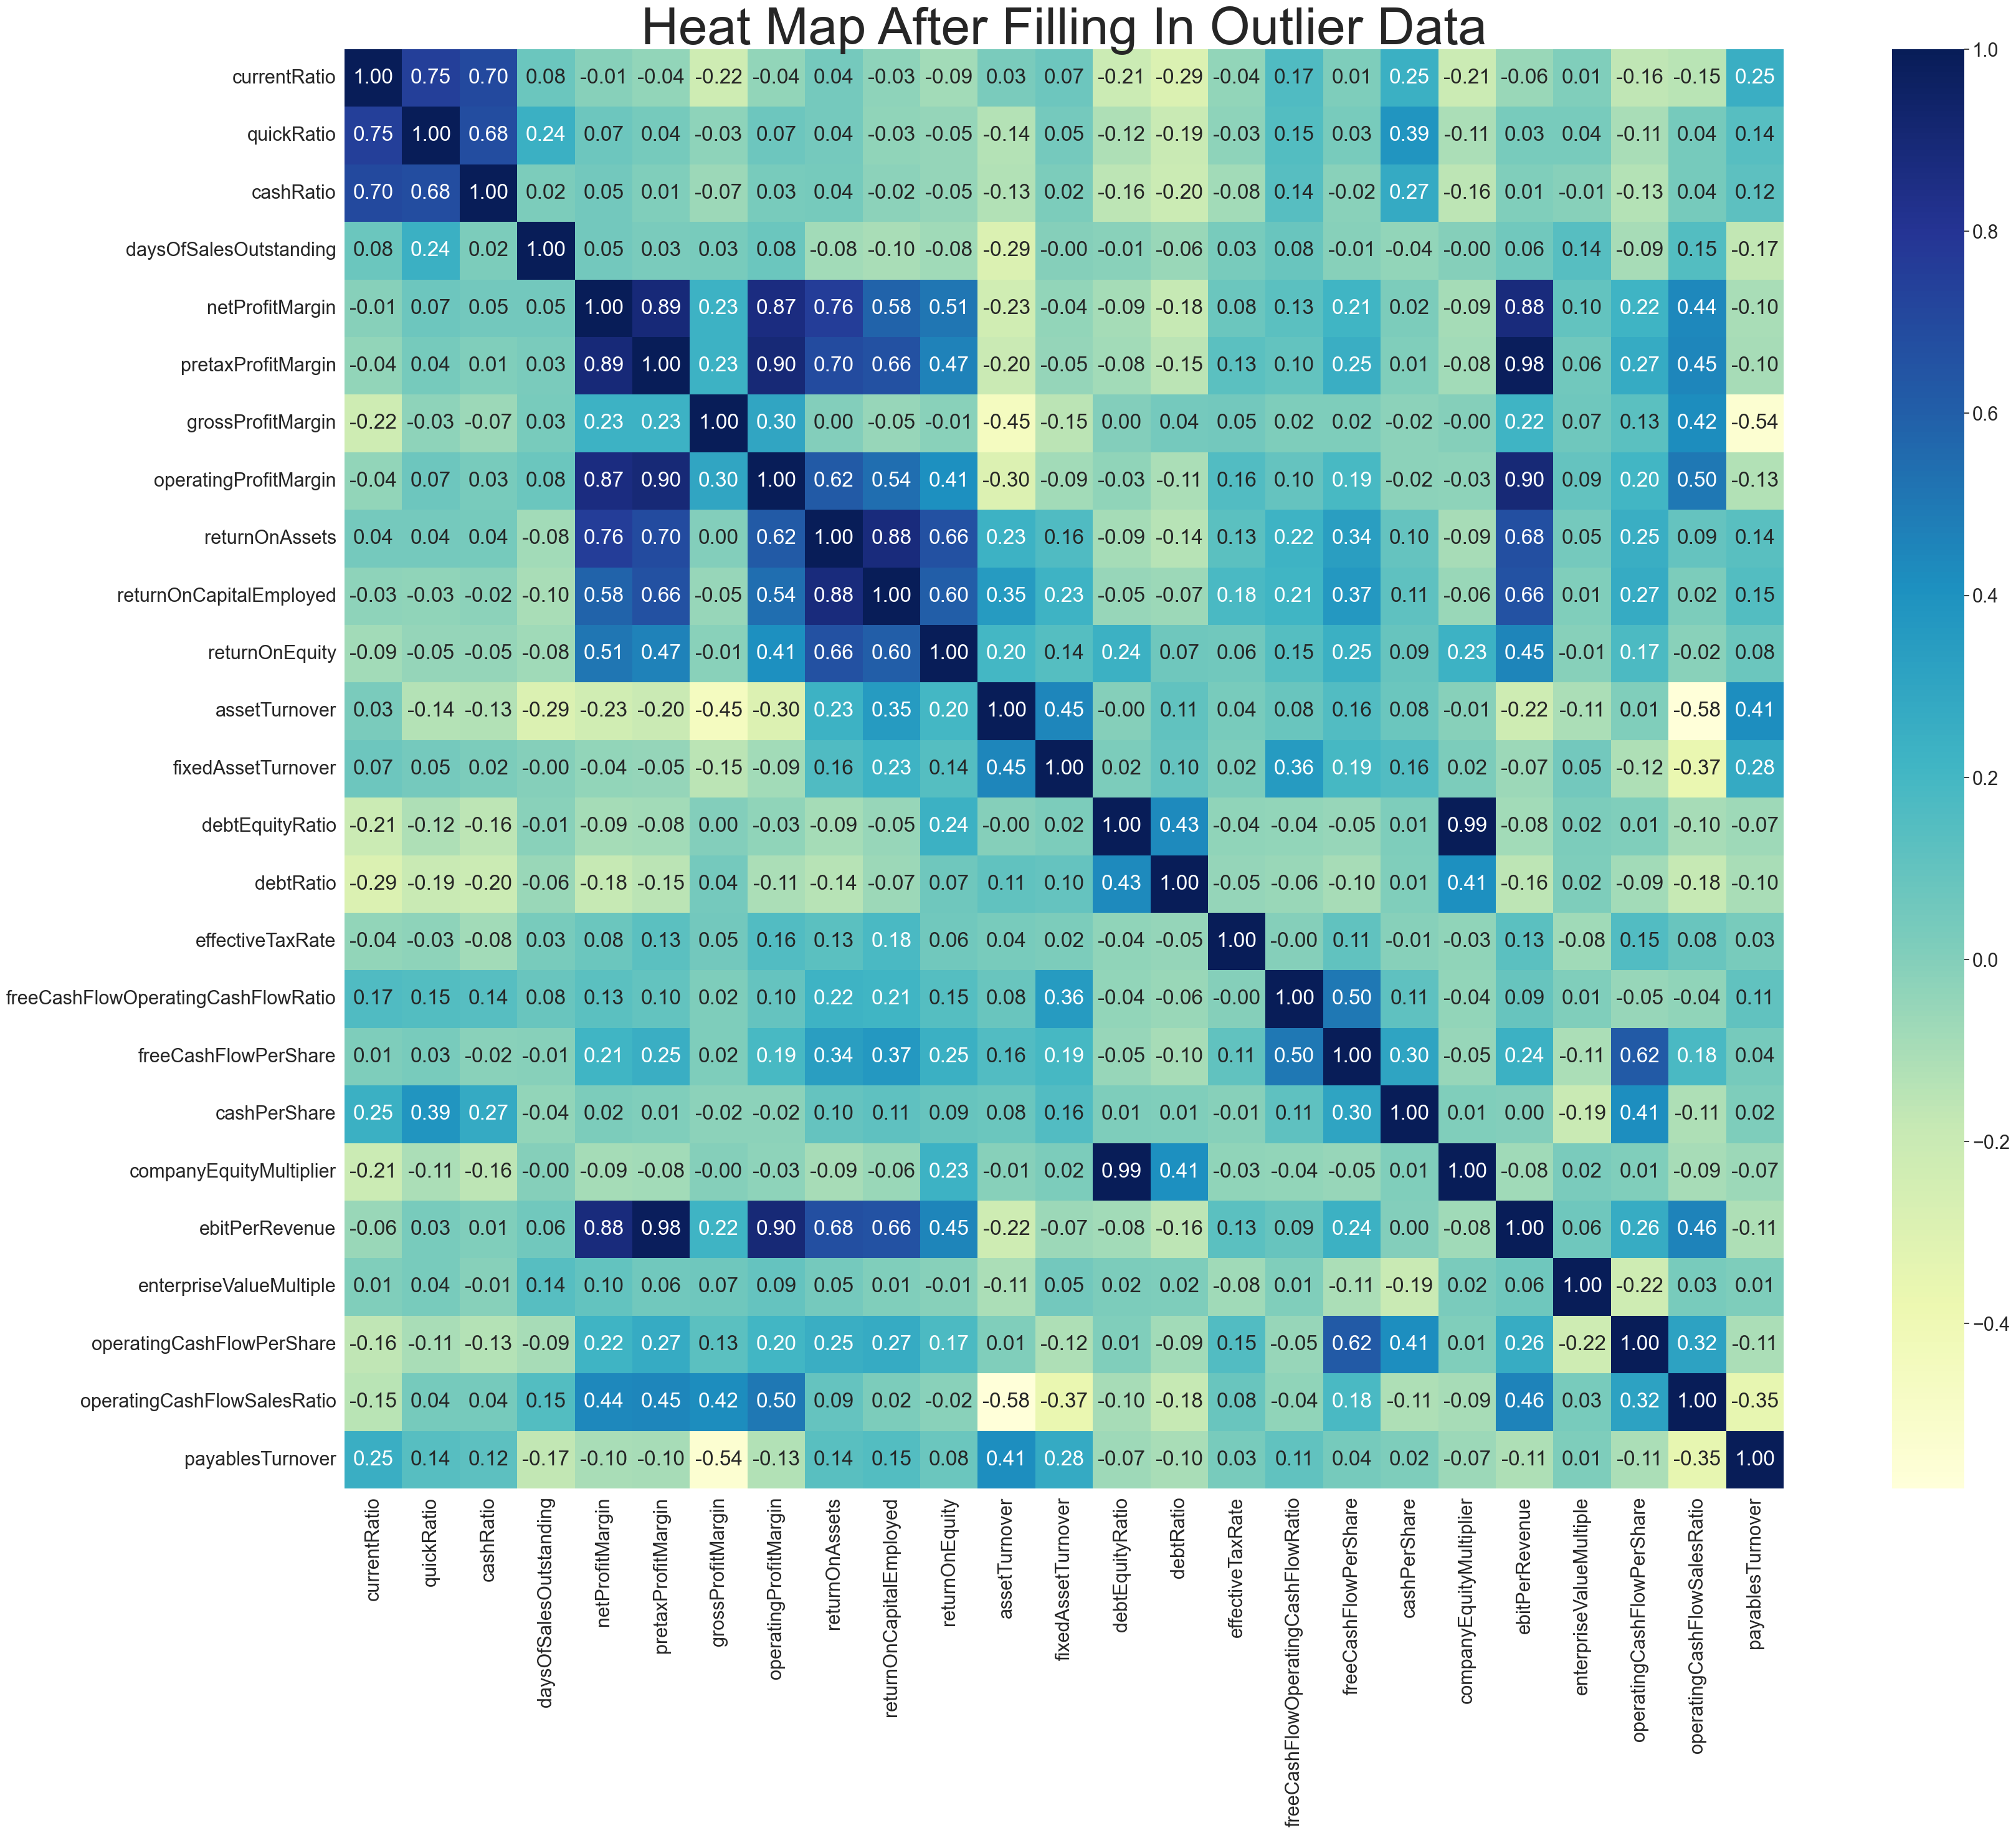

In [20]:
corr = df_fillin.iloc[:, 6:31].corr()
plt.figure(figsize=(45,30))
sns.set(font_scale=2) 
sns.heatmap(corr,cbar=True, annot=True, square=True ,fmt='.2f',cmap="YlGnBu")
plt.title("Heat Map After Filling In Outlier Data",fontsize=60)
plt.show()


In [21]:
df_fillin['Rating'].value_counts()

BBB    671
BB     490
A      398
B      302
AA      89
CCC     64
AAA      7
CC       5
C        2
D        1
Name: Rating, dtype: int64

In [22]:
df_fillin_prelevel = df_fillin.copy()

In [23]:
rating_maping_list = {'AAA':'Lowest Risk', 
                      'AA':'Low Risk','A':'Low Risk',
                      'BBB':'Medium Risk', 
                      'BB':'High Risk','B':'High Risk',
                      'CCC':'Highest Risk', 'CC':'Highest Risk','C':'Highest Risk',
                      'D':'In Default'}

df_fillin_prelevel['Rating'] = df_fillin_prelevel['Rating'].map(rating_maping_list)

Text(0.5, 1.0, 'Credit Rating')

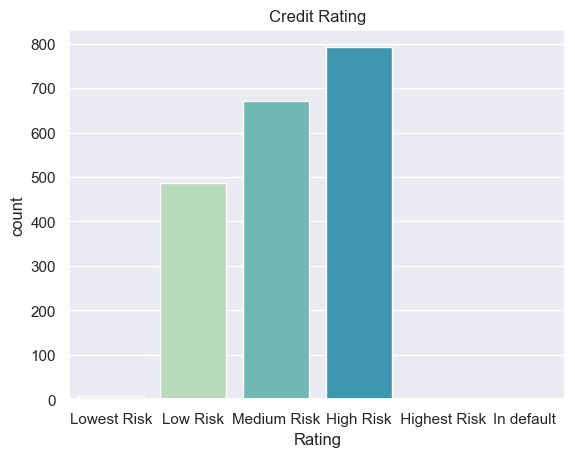

In [24]:
sns.set(font_scale=1) 
order = ['Lowest Risk','Low Risk','Medium Risk','High Risk',' Highest Risk','In default']
ax=sns.countplot(data=df_fillin_prelevel, x='Rating',order = order, palette="YlGnBu")
plt.title('Credit Rating')


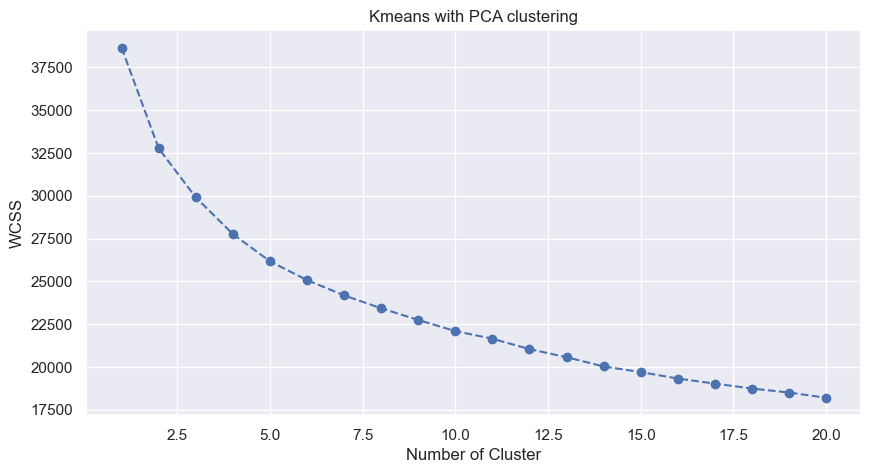

In [25]:
kmeans_data = df_fillin.iloc[:,5:]
le0 = LabelEncoder()
le0.fit(kmeans_data['Sector'])
kmeans_data['Sector'] = le0.transform(kmeans_data['Sector']) 
scaler_st = RobustScaler()
X_std = scaler_st.fit_transform(kmeans_data)
pca = PCA()
pca.fit(X_std)
scores_pca=pca.transform(X_std)
wcss=[]
for i in range(1,21):
    kmeans_pca = KMeans(n_clusters= i, init='k-means++',random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)
plt.figure(figsize=(10,5))
sns.set(font_scale=1) 
plt.plot(range(1,21),wcss,marker='o',linestyle ='--')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.title('Kmeans with PCA clustering')
plt.show()

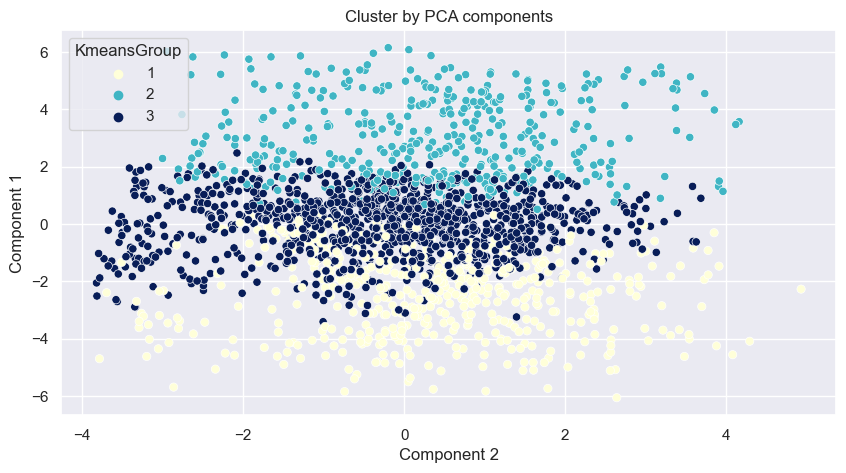

In [26]:
figsize=(15,5)
kmeans_pca = KMeans(n_clusters=3, init='k-means++',random_state=42)
kmeans_pca.fit(scores_pca)
pcadf = pd.DataFrame(scores_pca)
df_x_pca_kmeans = pd.concat([df_fillin.reset_index(drop=True),pcadf],axis=1)
df_x_pca_kmeans.columns.values[31:35]=['Component 1','Component 2','Component 3','Component 4']
df_x_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_
df_x_pca_kmeans['KmeansGroup'] = df_x_pca_kmeans['Segment K-means PCA']
df_x_pca_kmeans['KmeansGroup'] = df_x_pca_kmeans['KmeansGroup'] +1
x_axis = df_x_pca_kmeans['Component 2']
y_axis = df_x_pca_kmeans['Component 1']
plt.figure(figsize=(10,5))
sns.set(font_scale=1) 
hue_order=[1,2,3,4]
sns.scatterplot(x=x_axis,y=y_axis, hue = df_x_pca_kmeans['KmeansGroup'],hue_order=hue_order,palette="YlGnBu")
plt.title('Cluster by PCA components')
plt.show()

In [27]:
df_x_pca_kmeans.groupby('KmeansGroup')['Rating'].value_counts().unstack().fillna(0)

Rating           A    AA  AAA      B     BB    BBB    C   CC   CCC    D
KmeansGroup                                                            
1            148.0  43.0  7.0   41.0  105.0  175.0  1.0  0.0   6.0  0.0
2             11.0   1.0  0.0  142.0  135.0   86.0  0.0  5.0  44.0  1.0
3            239.0  45.0  0.0  119.0  250.0  410.0  1.0  0.0  14.0  0.0

In [28]:
rating_maping_list = {
                        'AAA':'Low Risk', 'AA':'Low Risk', 'A':'Medium Risk',
                        'BBB':'Medium Risk', 'BB':'Medium Risk', 
                        'B':'High Risk','CCC':'High Risk', 'CC':'High Risk', 'C':'High Risk','D':'High Risk'
                    }

df_fillin['Rating'] = df_fillin['Rating'].map(rating_maping_list)

Text(0.5, 0.98, 'Liquidity Measurement Ratios After Cleaning')

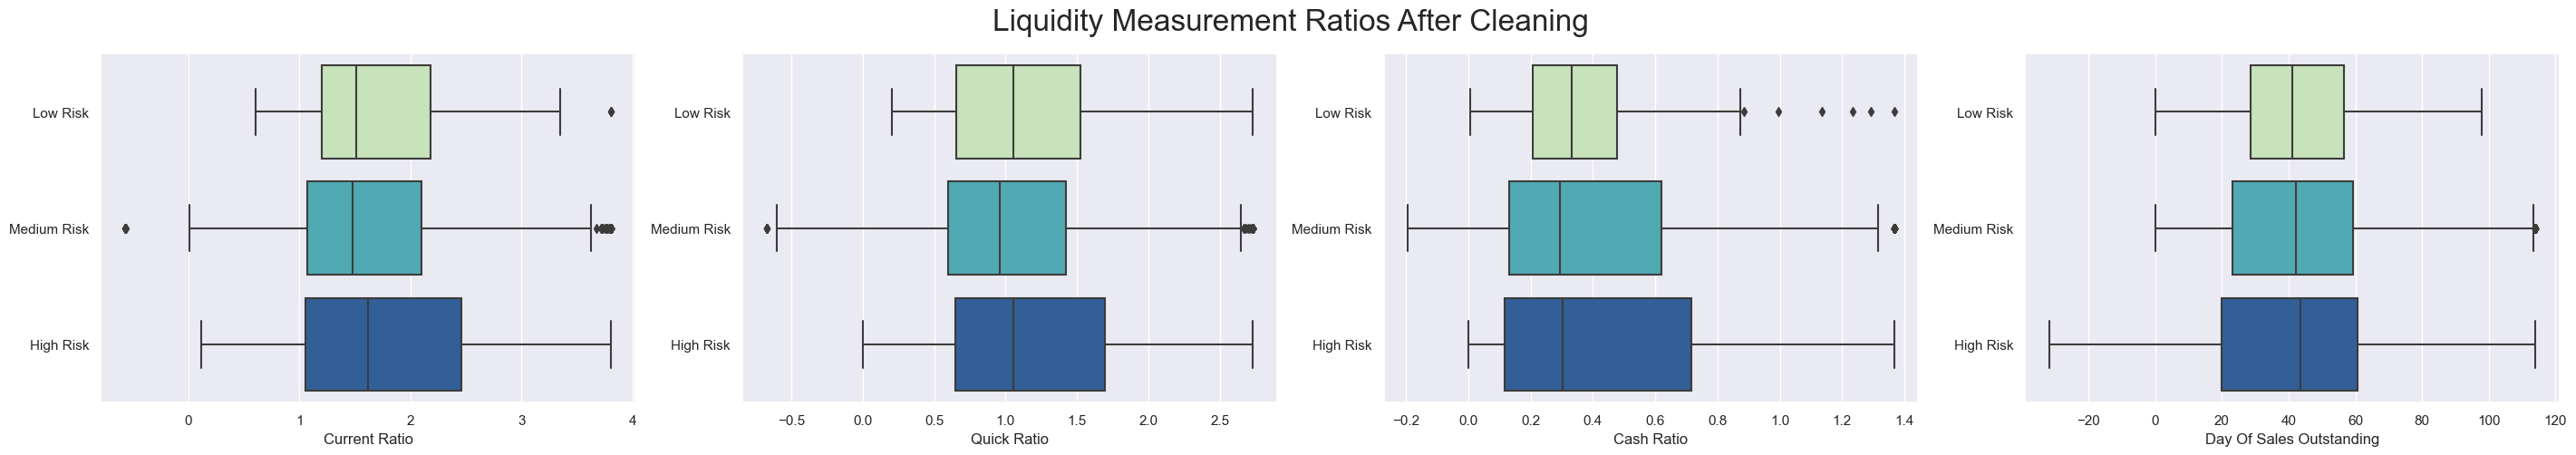

In [29]:
fig, axes = plt.subplots(1, 4,figsize=(35,5))
axes = axes.flatten()
order=['Low Risk','Medium Risk','High Risk']
sns.boxplot(ax = axes[0],x='currentRatio',y='Rating',data=df_fillin,palette="YlGnBu",order=order).set(
    xlabel="Current Ratio",ylabel="")
sns.boxplot(ax = axes[1],x='quickRatio',y='Rating',data=df_fillin,palette="YlGnBu",order=order).set(
    xlabel="Quick Ratio",ylabel="")
sns.boxplot(ax = axes[2],x='cashRatio',y='Rating',data=df_fillin,palette="YlGnBu",order=order).set(
    xlabel="Cash Ratio",ylabel="")
sns.boxplot(ax = axes[3],x='daysOfSalesOutstanding',y='Rating',data=df_fillin,palette="YlGnBu",order=order).set(
    xlabel="Day Of Sales Outstanding",ylabel="")
fig.suptitle("Liquidity Measurement Ratios After Cleaning",fontsize=24)

Text(0.5, 0.98, 'Profitability Indicator Ratios After Cleaning')

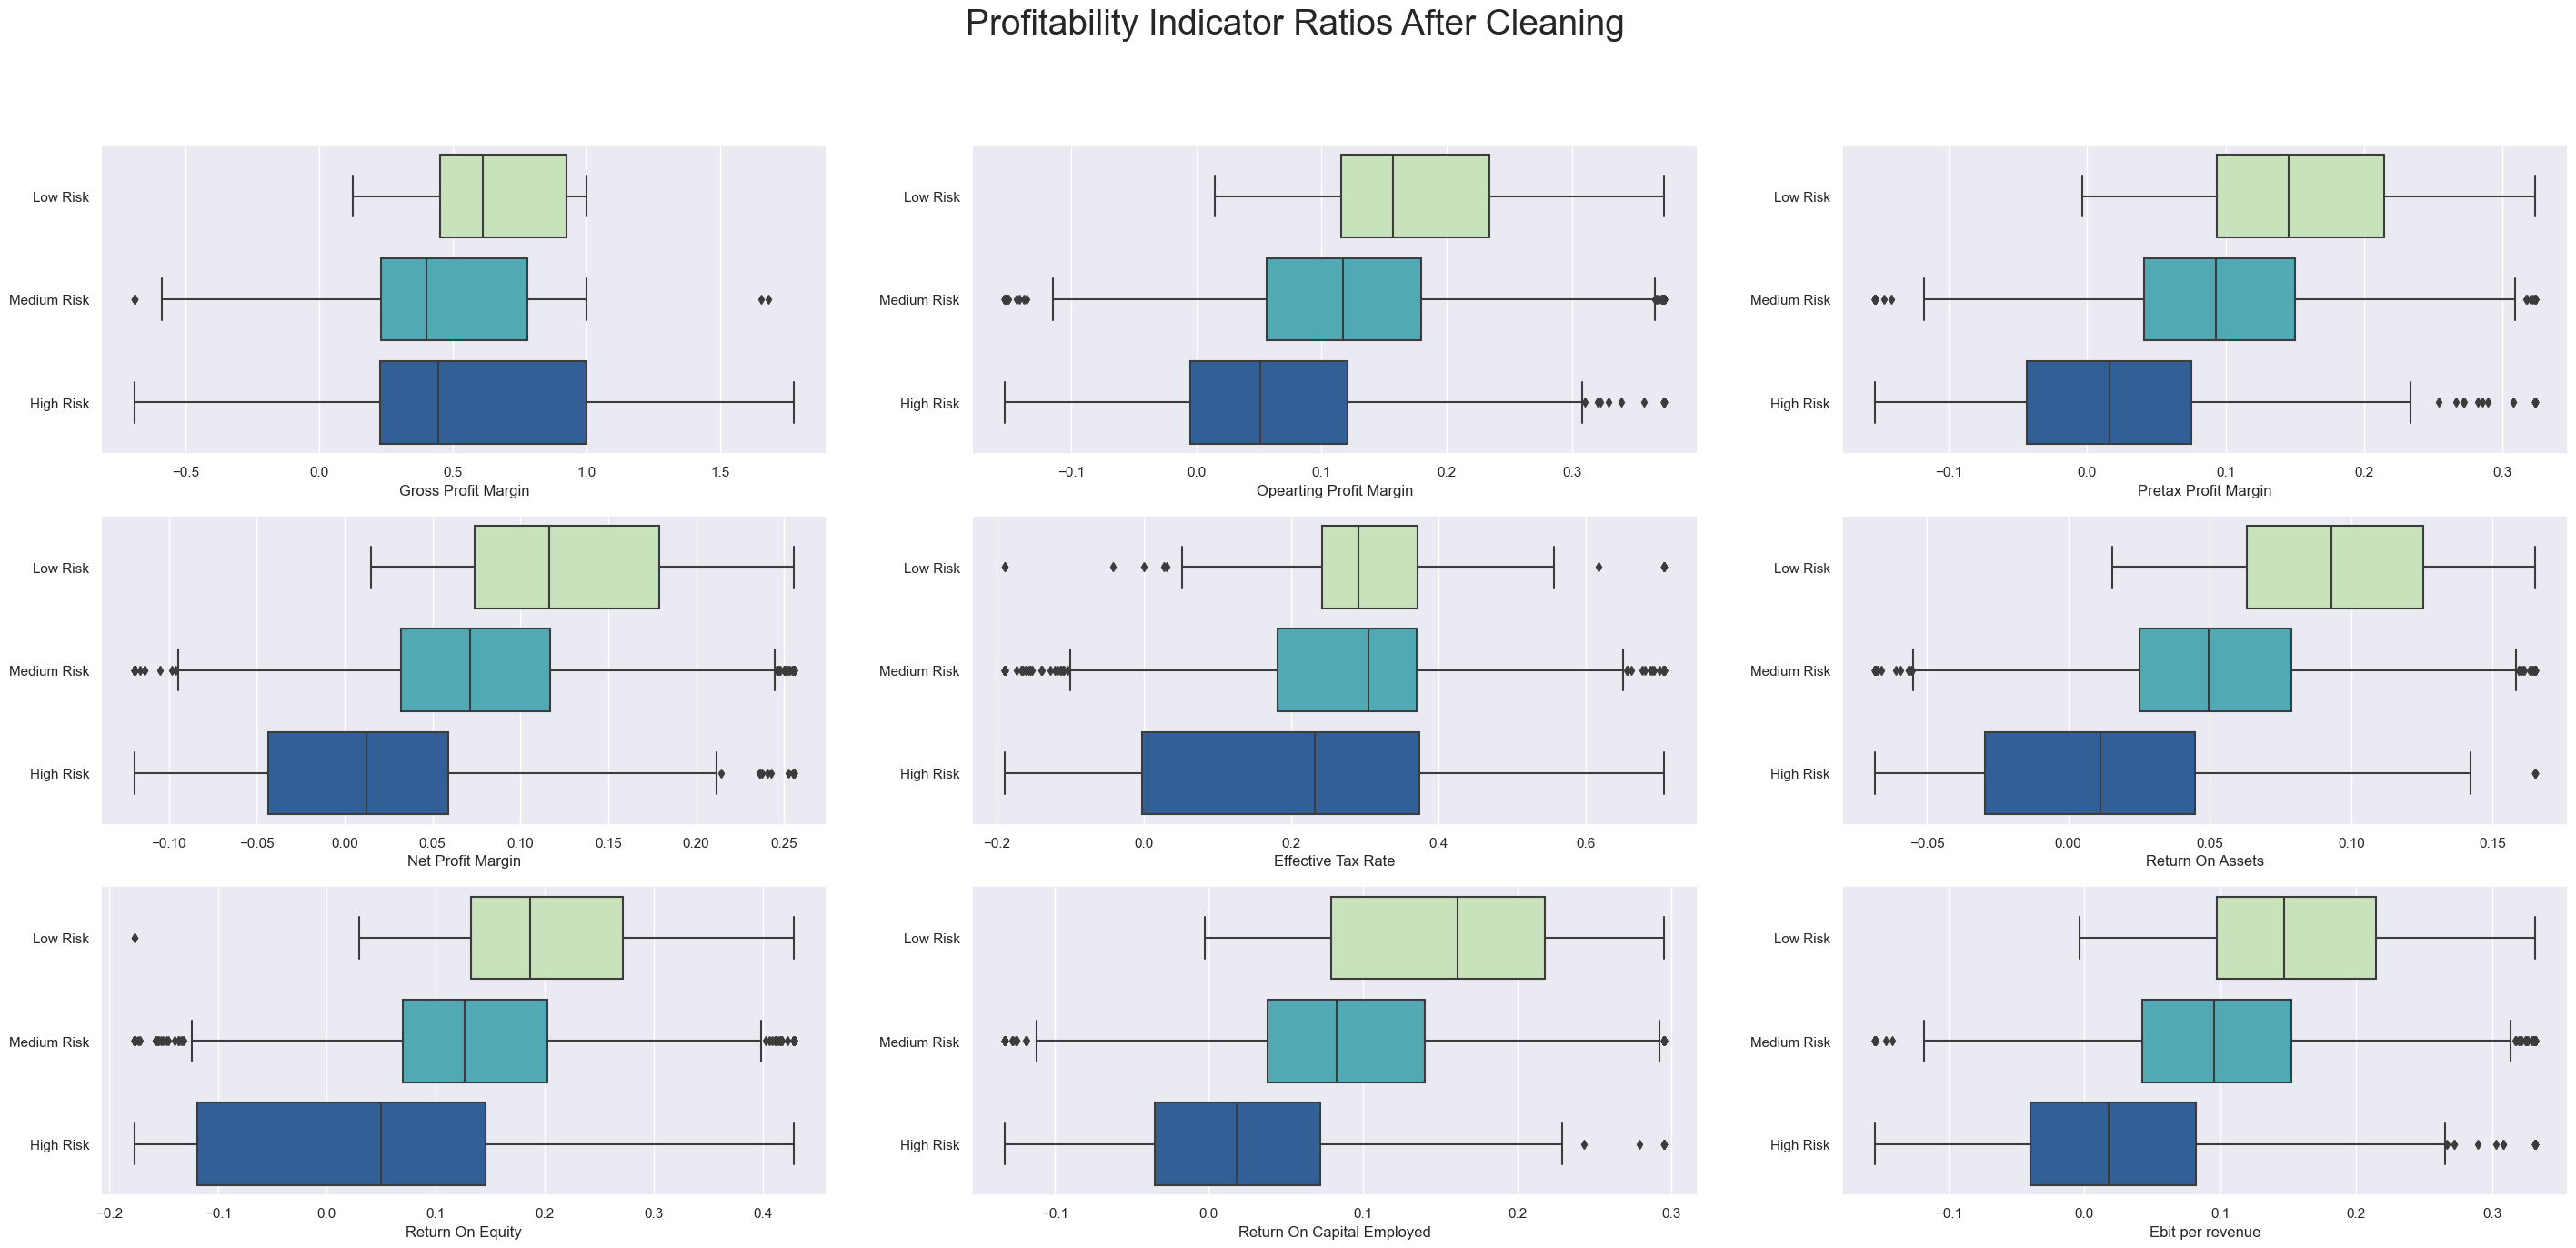

In [30]:
fig, axes = plt.subplots(3, 3,figsize=(35,15))
axes = axes.flatten()
order=['Low Risk','Medium Risk','High Risk']
sns.boxplot(ax = axes[0],x='grossProfitMargin',y='Rating',data=df_fillin,palette="YlGnBu",order=order).set(
    xlabel="Gross Profit Margin",ylabel="")
sns.boxplot(ax = axes[1],x='operatingProfitMargin',y='Rating',data=df_fillin,palette="YlGnBu",order=order).set(
    xlabel="Opearting Profit Margin",ylabel="")
sns.boxplot(ax = axes[2],x='pretaxProfitMargin',y='Rating',data=df_fillin,palette="YlGnBu",order=order).set(
    xlabel="Pretax Profit Margin",ylabel="")
sns.boxplot(ax = axes[3],x='netProfitMargin',y='Rating',data=df_fillin,palette="YlGnBu",order=order).set(
    xlabel="Net Profit Margin",ylabel="")
sns.boxplot(ax = axes[4],x='effectiveTaxRate',y='Rating',data=df_fillin,palette="YlGnBu",order=order).set(
    xlabel="Effective Tax Rate",ylabel="")
sns.boxplot(ax = axes[5],x='returnOnAssets',y='Rating',data=df_fillin,palette="YlGnBu",order=order).set(
    xlabel="Return On Assets",ylabel="")
sns.boxplot(ax = axes[6],x='returnOnEquity',y='Rating',data=df_fillin,palette="YlGnBu",order=order).set(
    xlabel="Return On Equity",ylabel="")
sns.boxplot(ax = axes[7],x='returnOnCapitalEmployed',y='Rating',data=df_fillin,palette="YlGnBu",order=order).set(
    xlabel="Return On Capital Employed",ylabel="")
sns.boxplot(ax = axes[8],x='ebitPerRevenue',y='Rating',data=df_fillin,palette="YlGnBu",order=order).set(
    xlabel="Ebit per revenue",ylabel="")
fig.suptitle("Profitability Indicator Ratios After Cleaning",fontsize=28)


Text(0.5, 0.98, 'Debt Ratios After Cleaning')

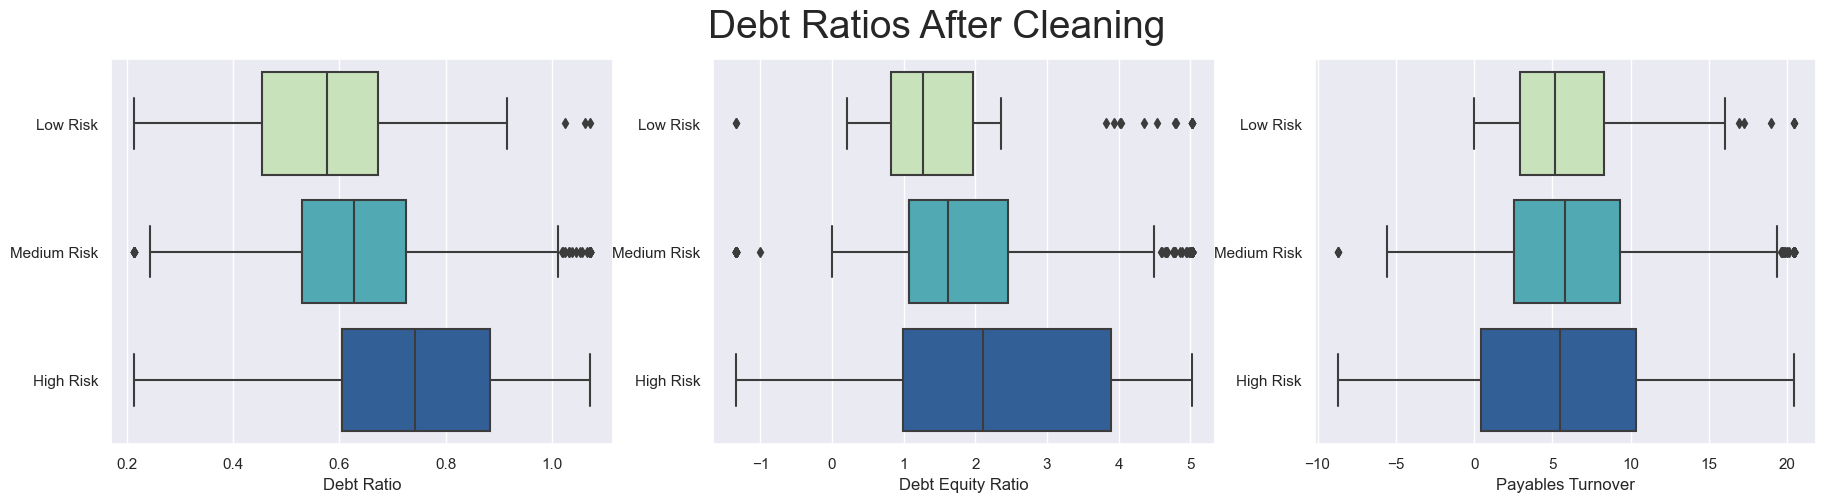

In [31]:
fig, axes = plt.subplots(1,3,figsize=(22,5))
axes = axes.flatten()
order=['Low Risk','Medium Risk','High Risk']
sns.boxplot(ax = axes[0],x='debtRatio',y="Rating",data=df_fillin,palette="YlGnBu",order=order).set(
    xlabel="Debt Ratio",ylabel="")
sns.boxplot(ax = axes[1],x='debtEquityRatio',y="Rating",data=df_fillin,palette="YlGnBu",order=order).set(
    xlabel="Debt Equity Ratio",ylabel="")
sns.boxplot(ax = axes[2],x='payablesTurnover',y="Rating",data=df_fillin,palette="YlGnBu",order=order).set(
    xlabel="Payables Turnover",ylabel="")
fig.suptitle("Debt Ratios After Cleaning",fontsize=28)

Text(0.5, 0.98, 'Opearting Performance Ratio')

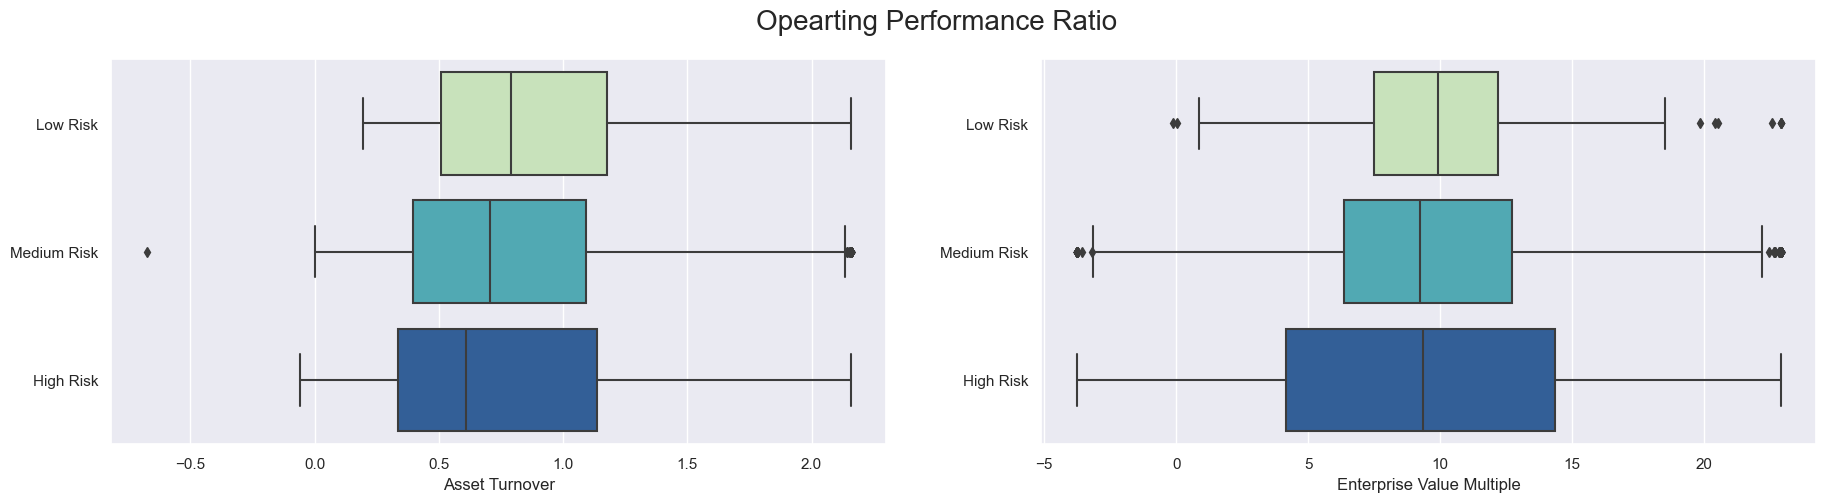

In [32]:
fig, axes = plt.subplots(1,2,figsize=(22,5))
axes = axes.flatten()
order=['Low Risk','Medium Risk','High Risk']
sns.boxplot(ax = axes[0],x='assetTurnover',y='Rating',data=df_fillin,palette="YlGnBu",order=order).set(
    xlabel='Asset Turnover',ylabel="")
sns.boxplot(ax = axes[1],x='enterpriseValueMultiple',y="Rating",data=df_fillin,palette="YlGnBu",order=order).set(
    xlabel="Enterprise Value Multiple",ylabel="")
fig.suptitle("Opearting Performance Ratio",fontsize=20)

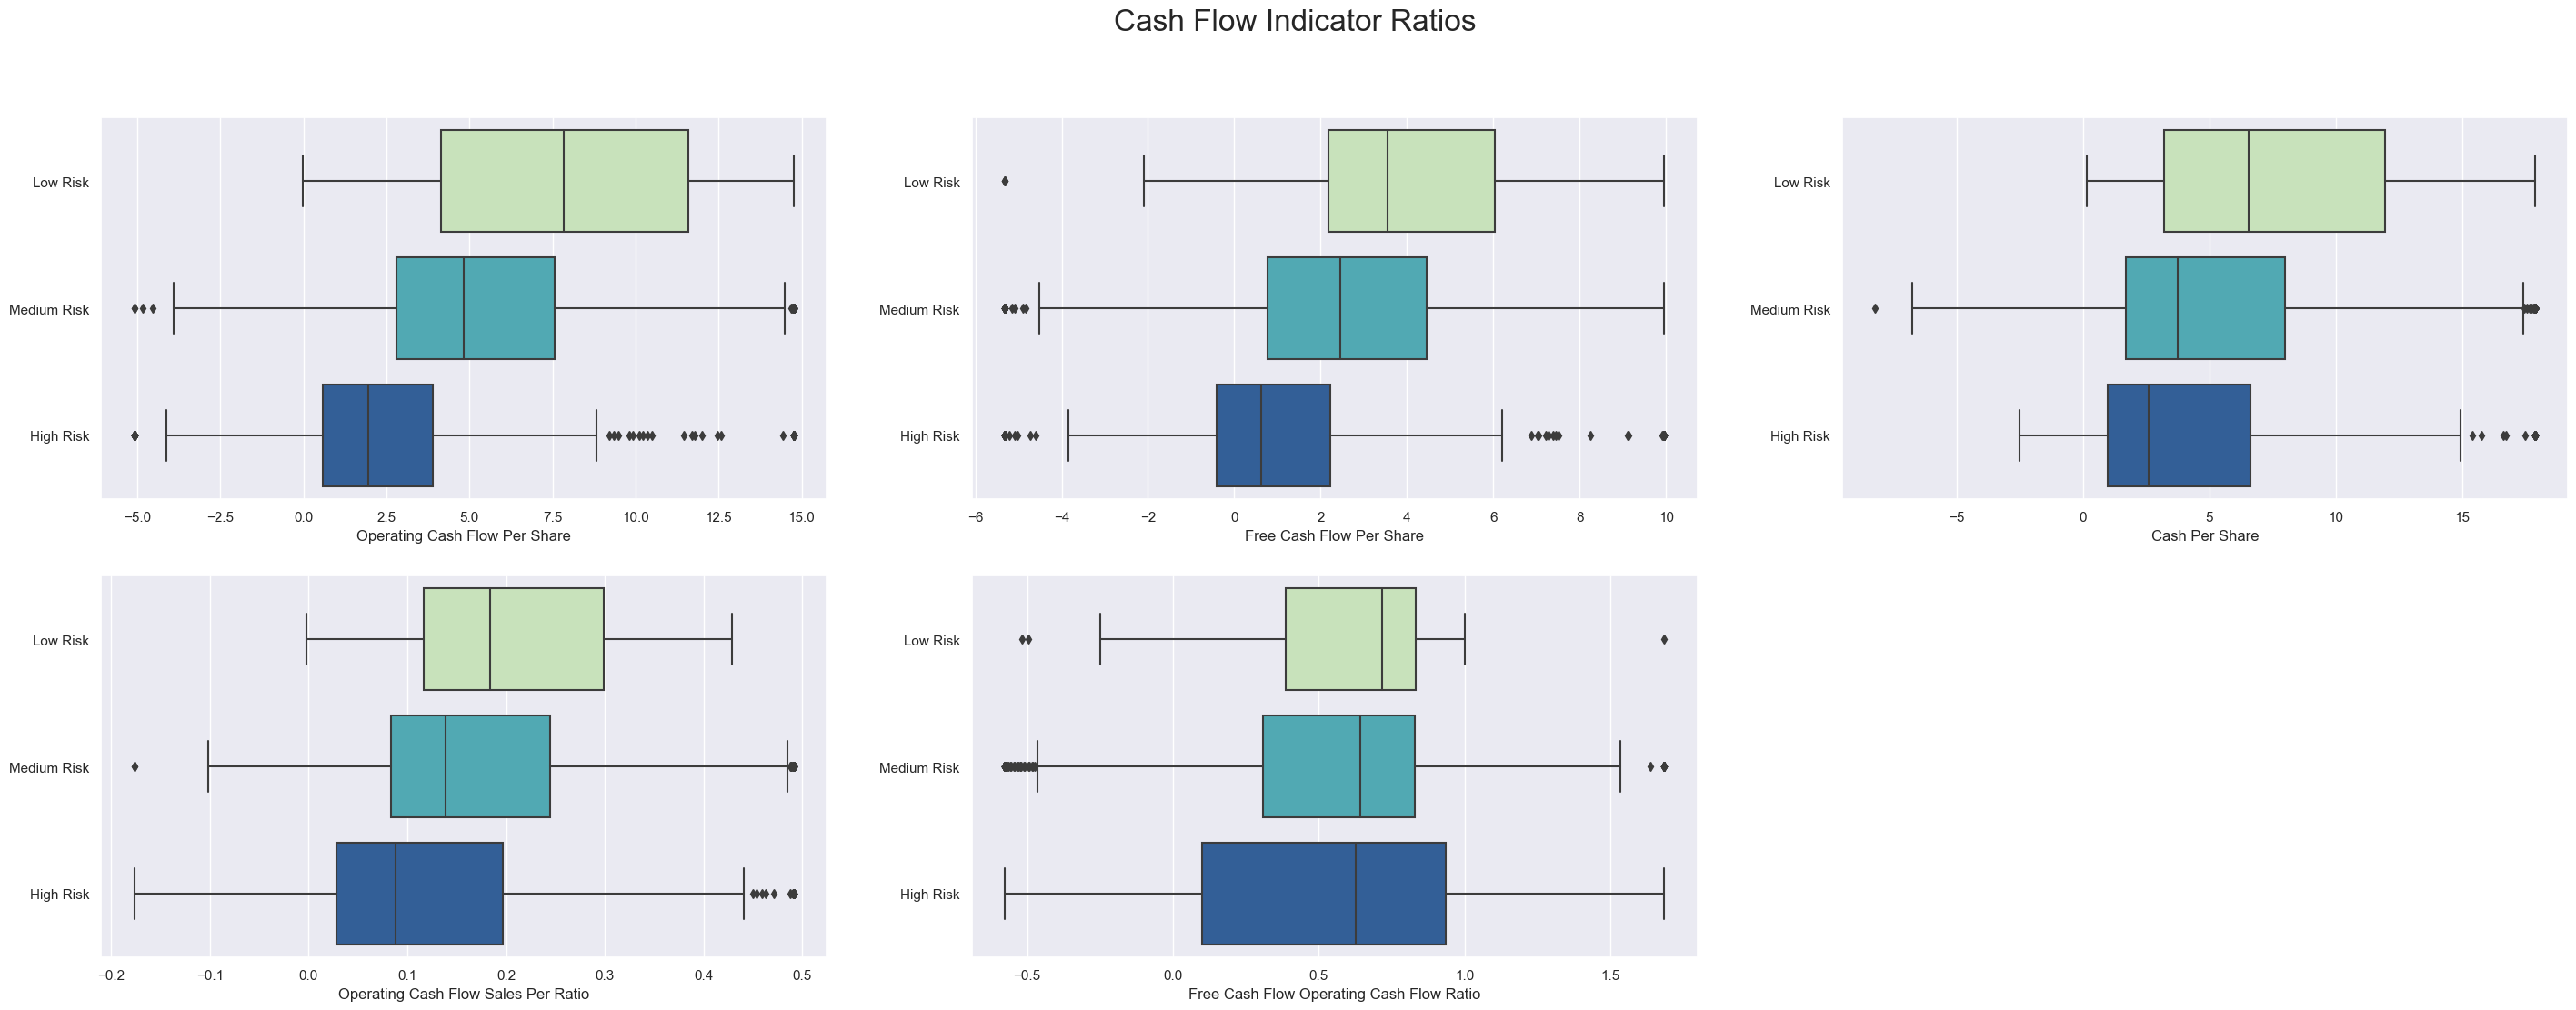

In [33]:
fig, axes = plt.subplots(2,3,figsize=(35,12))
axes = axes.flatten()
order=['Low Risk','Medium Risk','High Risk']
sns.boxplot(ax = axes[0],x='operatingCashFlowPerShare',y='Rating',data=df_fillin,palette="YlGnBu",order=order).set(
    xlabel="Operating Cash Flow Per Share",ylabel="")
sns.boxplot(ax = axes[1],x='freeCashFlowPerShare',y='Rating',data=df_fillin,palette="YlGnBu",order=order).set(
    xlabel="Free Cash Flow Per Share",ylabel="")
sns.boxplot(ax = axes[2],x='cashPerShare',y='Rating',data=df_fillin,palette="YlGnBu",order=order).set(
    xlabel="Cash Per Share",ylabel="")
sns.boxplot(ax = axes[3],x='operatingCashFlowSalesRatio',y='Rating',data=df_fillin,palette="YlGnBu",order=order).set(
    xlabel="Operating Cash Flow Sales Per Ratio",ylabel="")
sns.boxplot(ax = axes[4],x='freeCashFlowOperatingCashFlowRatio',y='Rating',data=df_fillin,palette="YlGnBu",order=order).set(
    xlabel="Free Cash Flow Operating Cash Flow Ratio",ylabel="")
fig.suptitle("Cash Flow Indicator Ratios",fontsize=24)
fig.delaxes(axes[5]) 

Text(0.5, 1.0, 'Risk Ratio')

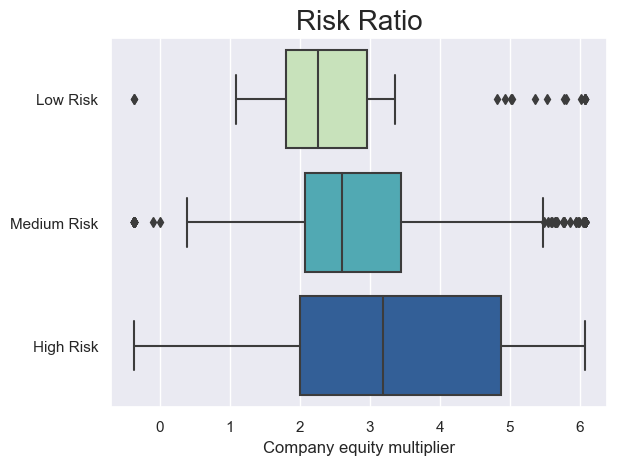

In [34]:
figsize=(22,5)
order=['Low Risk','Medium Risk','High Risk']
sns.boxplot(x='companyEquityMultiplier',y='Rating',data=df_fillin,palette="YlGnBu",order=order).set(
    xlabel='Company equity multiplier',ylabel="")
plt.title("Risk Ratio",fontsize=20)

Text(0, 0.5, '')

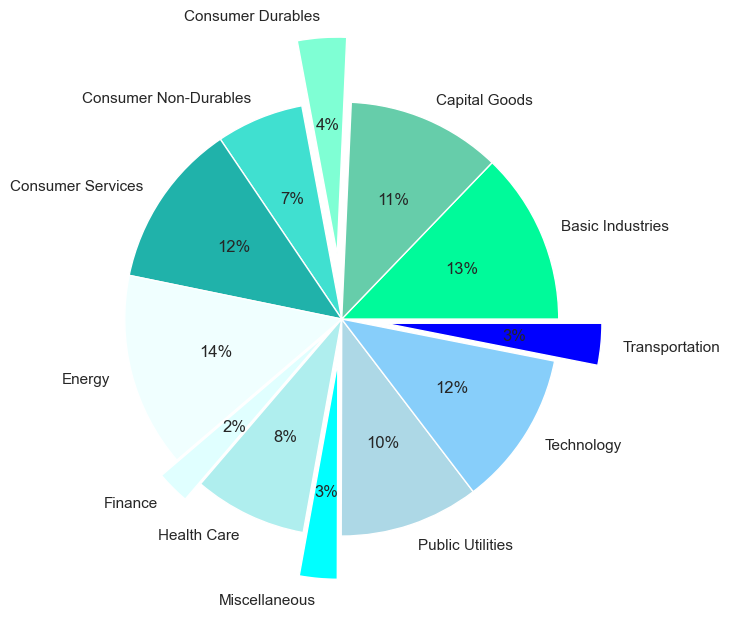

In [37]:
plt.figure(figsize=(7,10))
colors = ['mediumspringgreen','mediumaquamarine','aquamarine','turquoise',
'lightseagreen','azure','lightcyan','paleturquoise','aqua','lightblue','lightskyblue','blue']
explode = (0,0,0.3,0,0,0,0.1,0,0.2,0,0,0.2)
df_fillin['Sector'].str.get_dummies().sum().plot.pie(autopct='%.0f%%',label=False,colors=colors,explode=explode)
plt.ylabel("")


Text(0.5, 1.0, 'Credit Rating')

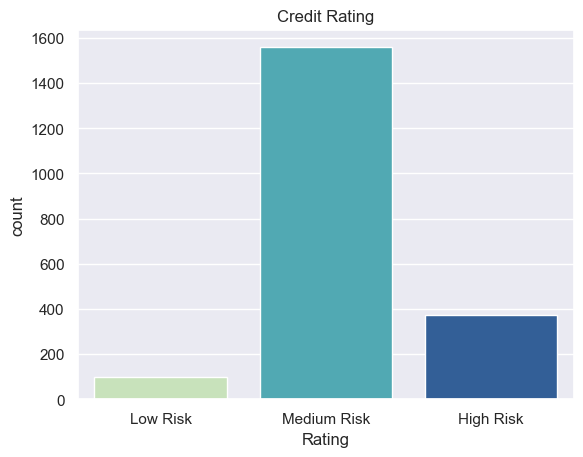

In [38]:
sns.set(font_scale=1) 
ax=sns.countplot(data=df_fillin, x='Rating',order=['Low Risk','Medium Risk','High Risk'],palette="YlGnBu")
plt.title('Credit Rating')


In [39]:
df_fillin

Rating                         Name Symbol  \
0     Medium Risk        Whirlpool Corporation    WHR   
1     Medium Risk        Whirlpool Corporation    WHR   
2     Medium Risk        Whirlpool Corporation    WHR   
3     Medium Risk        Whirlpool Corporation    WHR   
4     Medium Risk        Whirlpool Corporation    WHR   
...           ...                          ...    ...   
2024  Medium Risk                    NVR, Inc.    NVR   
2025  Medium Risk  Kaiser Aluminum Corporation   KALU   
2026    High Risk       Cresud S.A.C.I.F. y A.  CRESY   
2027    High Risk       Cresud S.A.C.I.F. y A.  CRESY   
2028    High Risk       Cresud S.A.C.I.F. y A.  CRESY   

                      Rating Agency Name        Date             Sector  \
0             Egan-Jones Ratings Company  11/27/2015  Consumer Durables   
1             Egan-Jones Ratings Company   2/13/2014  Consumer Durables   
2                          Fitch Ratings    3/6/2015  Consumer Durables   
3                          Fitch Ratings   6/15/2012  Consumer Durables   
4     Standard & Poor's Ratings Services  10/24/2016  Consumer Durables   
...                                  ...         ...                ...   
2024           Moody's Investors Service    9/5/2012      Capital Goods   
2025  Standard & Poor's Ratings Services   4/28/2016      Capital Goods   
2026                       Fitch Ratings  11/30/2012            Finance   
2027                       Fitch Ratings   6/15/2012            Finance   
2028                       Fitch Ratings    8/1/2014            Finance   

      currentRatio  quickRatio  cashRatio  daysOfSalesOutstanding  ...  \
0         0.945894    0.426395   0.099690               44.203245  ...   
1         1.033559    0.498234   0.203120               38.991156  ...   
2         0.963703    0.451505   0.122099               50.841385  ...   
3         1.019851    0.510402   0.176116               41.161738  ...   
4         0.957844    0.495432   0.141608               47.761126  ...   
...            ...         ...        ...                     ...  ...   
2024      3.809332    2.730312   1.366320                1.079762  ...   
2025      2.962788    1.294743   0.428234               30.602414  ...   
2026      0.883875    0.842553   0.233830              113.951268  ...   
2027      0.911713    0.748356   0.310640              113.951268  ...   
2028      1.085007    1.026375   0.203490              113.951268  ...   

      effectiveTaxRate  freeCashFlowOperatingCashFlowRatio  \
0             0.202716                            0.437551   
1             0.074155                            0.541997   
2             0.214529                            0.513185   
3             0.706351                           -0.147170   
4             0.166966                            0.451372   
...                ...                                 ...   
2024          0.343500                            0.953231   
2025          0.363636                            0.602645   
2026          0.706351                            0.926665   
2027          0.331525                            0.692804   
2028          0.266987                            1.101462   

      freeCashFlowPerShare  cashPerShare  companyEquityMultiplier  \
0                 6.810673      9.809403                 4.008012   
1                 8.625473     17.402270                 3.156783   
2                 9.693487     13.103448                 4.094575   
3                -1.015625     14.440104                 3.630950   
4                 7.135348     14.257556                 4.012780   
...                    ...           ...                      ...   
2024              9.957644     17.866324                 1.759461   
2025              5.563630      5.958956                 1.614282   
2026              1.459801      1.056480                 4.034952   
2027              0.744377      1.470201                 3.825856   
2028              2.487817      

In [40]:
le1 = LabelEncoder()
le1.fit(df_fillin['Rating'])
df_fillin['Rating'] = le1.transform(df_fillin['Rating'])

le2 = LabelEncoder()
le2.fit(df_fillin['Sector'])
df_fillin['Sector'] = le2.transform(df_fillin['Sector']) 

X=df_fillin.iloc[:,5:]
y=df_fillin['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

scaler = RobustScaler()
X_train = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns = X_train.columns
)

X_test = pd.DataFrame(
    scaler.transform(X_test),
    columns = X_test.columns
)



In [41]:
fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(X_train, y_train)
features_list = []
scores_list = []
for i in range(len(fs.scores_)):
 features_list.append(df_fillin.iloc[:,5:].columns[i])
 scores_list.append(fs.scores_[i])
df_features = pd.DataFrame({'Features': features_list, 'Scores': scores_list})
df_features = df_features.sort_values(by=['Scores'],ascending=False)
plt.figure(figsize=(25,10))
sns.barplot(x='Features', y='Scores', data=df_features[0:10],palette="YlGnBu")
plt.title("ANOVA P value")

In [45]:
df_features['Features'][0:10]

9                returnOnAssets
10      returnOnCapitalEmployed
23    operatingCashFlowPerShare
6            pretaxProfitMargin
5               netProfitMargin
21               ebitPerRevenue
15                    debtRatio
8         operatingProfitMargin
11               returnOnEquity
18         freeCashFlowPerShare
Name: Features, dtype: object

In [46]:
X=df_fillin.loc[:,['returnOnAssets','returnOnCapitalEmployed','operatingCashFlowPerShare','pretaxProfitMargin',
'netProfitMargin','ebitPerRevenue','debtRatio','operatingProfitMargin','returnOnEquity','freeCashFlowPerShare']]
y=df_fillin['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

scaler = RobustScaler()
X_train = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns = X_train.columns
)

X_test = pd.DataFrame(
    scaler.transform(X_test),
    columns = X_test.columns
)
Runtime = []

In [51]:
start = time.time()

logr = LogisticRegression()
param_grid_logr = [
    {'penalty':['l2','elasticnet','none'],
    'C':[0.001,0.01,0.1,1,10,20,50,100],
    'solver':['lbfgs','newton-cg','liblinear','sag','saga'],
    'multi_class':['auto','ovr','multinomial'],
    'class_weight':['balanced']
    }
]
param_logr = GridSearchCV(logr, param_grid = param_grid_logr, cv = 3, verbose=True,scoring='accuracy')
best_param_logr = param_logr.fit(X_train,y_train)
end = time.time()
Runtime.append(end - start)
print("The best parameters for logistic regression",best_param_logr.best_params_)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits
The best parameters for logistic regression {'C': 0.01, 'class_weight': 'balanced', 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'liblinear'}


In [53]:
logr = LogisticRegression(C = 0.01 ,multi_class='auto',penalty='l2',solver='liblinear',class_weight='balanced')
logr.fit(X_train,y_train)
logr_Prediction = logr.predict(X_test)
Accuracy_Logistic = accuracy_score(y_test,logr_Prediction)
print("The accuracy score of logisitc regression is:",Accuracy_Logistic)

The accuracy score of logisitc regression is: 0.729064039408867


In [54]:
start = time.time()
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_Prediction = gnb.predict(X_test)
Accuracy_NaiveBayes = accuracy_score(y_test,gnb_Prediction)
end = time.time()
Runtime.append(end - start)
print("The accuracy score of naive classifier is:",Accuracy_NaiveBayes)

The accuracy score of naive classifier is: 0.6748768472906403


In [55]:
start = time.time()
svm = SVC()
param_grid_svm = [
    {
    'kernel':['rbf','linear','sigmoid'],
    'gamma':['scale', 'auto'],
    'class_weight':['dict' , 'balanced'],
    'decision_function_shape':['ovo', 'ovr'],
    }
]
param_svm = GridSearchCV(svm, param_grid = param_grid_svm, cv = 3, verbose=True,scoring="accuracy")
best_param_svm = param_svm.fit(X_train,y_train)
end = time.time()
Runtime.append(end - start)
print("The best parameters for support vector machine",best_param_svm.best_params_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
The best parameters for support vector machine {'class_weight': 'balanced', 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf'}


In [56]:
svm = SVC(kernel='rbf',class_weight='balanced',decision_function_shape='ovo',gamma='scale')
svm.fit(X_train, y_train)
svm_Prediction = svm.predict(X_test)
Accuracy_SVM = accuracy_score(y_test,svm_Prediction)
print("The accuracy score of support vector machine is:",Accuracy_SVM)

The accuracy score of support vector machine is: 0.5615763546798029


In [54]:
start = time.time()
rf = RandomForestClassifier()
param_grid_rf = [
    {'n_estimators':[100,200,400,600],
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_features':['sqrt', 'log2', None],
    'class_weight':['balanced', 'balanced_subsample'],
    'random_state':[42],

    }
]
param_rf = GridSearchCV(rf, param_grid = param_grid_rf, cv = 3, verbose=True,scoring="accuracy")
best_param_rf = param_rf.fit(X_train,y_train)
end = time.time()
Runtime.append(end - start)
print("The best parameters for random forest",best_param_rf.best_params_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
The best parameters for random forest {'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 200, 'random_state': 42}


In [50]:
rf_Model = RandomForestClassifier(class_weight='balanced',criterion='entropy',max_features='sqrt',n_estimators=200,random_state=42)
rf_Model.fit(X_train, y_train)
rf_Prediction = rf_Model.predict(X_test)
Accuracy_RandomForest = accuracy_score(y_test,rf_Prediction)
print("The accuracy score of random forest is:",Accuracy_RandomForest)

The accuracy score of random forest is: 0.7931034482758621


In [56]:
start = time.time()
gb = GradientBoostingClassifier()
param_grid_gb = [
    {
    'loss':['log_loss', 'deviance', 'exponential'],
    'learning_rate':[0.1,0.01,0.001],
    'n_estimators':[100,200,400,600,800],
    'subsample':[0.0,0.5,1],
    'criterion':['friedman_mse', 'squared_error', 'mse'],
    }
]
param_gb = GridSearchCV(gb, param_grid = param_grid_gb, cv = 3, verbose=True,scoring="accuracy")
best_param_gb = param_gb.fit(X_train,y_train)
end = time.time()
Runtime.append(end - start)
print("The best parameters for Gradient Boosting",best_param_gb.best_params_)

Fitting 3 folds for each of 405 candidates, totalling 1215 fits
The best parameters for Gradient Boosting {'criterion': 'friedman_mse', 'learning_rate': 0.01, 'loss': 'log_loss', 'n_estimators': 400, 'subsample': 1}


In [57]:
gb_Model = GradientBoostingClassifier(criterion = 'friedman_mse',learning_rate=0.01, loss='accuracy',n_estimators=400,subsample=1)
gb_Model.fit(X_train, y_train)
gb_Prediction = gb_Model.predict(X_test)
Accuracy_gb = accuracy_score(y_test,gb_Prediction)
print("The accuracy score of Gradient Boosting is:",Accuracy_gb)

The accuracy score of Gradient Boosting is: 0.7881773399014779


In [58]:
model_list = ['Logistic Regression', 'Naive Bayes','Support Vector Machine','Random forest','Gradient Boosting']
accuracy_list = [Accuracy_Logistic, Accuracy_NaiveBayes, Accuracy_SVM, Accuracy_RandomForest, Accuracy_gb]
df_models = pd.DataFrame({'Machine Learning Models': model_list, 'Accuracy': accuracy_list, 'Training Time (s)': Runtime})
df_models

Machine Learning Models  Accuracy  Training Time (s)
0     Logistic Regression  0.743842          19.341565
1             Naive Bayes  0.674877           0.011868
2  Support Vector Machine  0.561576           6.728043
3           Random forest  0.793103         436.240312
4       Gradient Boosting  0.788177        2082.442169